# Uni-Modal Image Features

## Logistic regression 

In [37]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# -----------------------------
# Load Feature Files
# -----------------------------
train_features = np.load("Deit_train_features_1.npy")  # shape (num_train_samples, deit_feature_dim)
val_features   = np.load("Deit_val_features_1.npy")      # shape (num_val_samples, deit_feature_dim)
test_features  = np.load("Deit_test_features_1.npy")     # shape (num_test_samples, deit_feature_dim)

# -----------------------------
# Load CSV Files with Labels
# -----------------------------
train_data = pd.read_csv("train_data_3.csv")
val_data   = pd.read_csv("val_data_3.csv")
test_data  = pd.read_csv("test_data_3.csv")

# Extract label arrays (assuming the column is named "Group")
y_train = train_data["Group"].values
y_val   = val_data["Group"].values
y_test  = test_data["Group"].values

# -----------------------------
# Encode Labels to Integers
# -----------------------------
# Assuming the groups are "CN", "MCI", "AD", map them to 0, 1, 2.
label_map = {"CN": 0, "MCI": 1, "AD": 2}
y_train = np.array([label_map[label] for label in y_train])
y_val   = np.array([label_map[label] for label in y_val])
y_test  = np.array([label_map[label] for label in y_test])

# -----------------------------
# Train Logistic Regression Model
# -----------------------------
clf = LogisticRegression(max_iter=1000, random_state=42)
clf.fit(train_features, y_train)

# -----------------------------
# Evaluate on Training, Validation, and Test Splits
# -----------------------------
train_preds = clf.predict(train_features)
train_acc = accuracy_score(y_train, train_preds)
print("Train Accuracy:", train_acc)

val_preds = clf.predict(val_features)
val_acc = accuracy_score(y_val, val_preds)
print("Validation Accuracy:", val_acc)

test_preds = clf.predict(test_features)
test_acc = accuracy_score(y_test, test_preds)
print("Test Accuracy:", test_acc)

print("\nClassification Report on Test Data:")
print(classification_report(y_test, test_preds))



Train Accuracy: 0.9601246105919004
Validation Accuracy: 0.5872093023255814
Test Accuracy: 0.5652173913043478

Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.54      0.58      0.56       106
           1       0.64      0.57      0.61       167
           2       0.45      0.51      0.48        72

    accuracy                           0.57       345
   macro avg       0.55      0.56      0.55       345
weighted avg       0.57      0.57      0.57       345



/home/sran-m36/Multi Modal Project/multimodal_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## MLP + KNN + Randomforest + SVC

In [10]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# -----------------------------
# Load DEiT Features from .npy files
# -----------------------------
# -----------------------------
X_train = np.load("Deit_train_features_1.npy")  # shape: (num_train_samples, deit_feature_dim)
X_val   = np.load("Deit_val_features_1.npy")      # shape: (num_val_samples, deit_feature_dim)
X_test  = np.load("Deit_test_features_1.npy")     # shape: (num_test_samples, deit_feature_dim)

# -----------------------------
# Load CSV Files with Labels
# -----------------------------
train_data = pd.read_csv("train_data_3.csv")
val_data   = pd.read_csv("val_data_3.csv")
test_data  = pd.read_csv("test_data_3.csv")

# Extract label arrays (assuming the column is named "Group")
y_train = train_data["Group"].values
y_val   = val_data["Group"].values
y_test  = test_data["Group"].values


# -----------------------------
# Encode Labels to Integers
# -----------------------------
# Assuming the groups are "CN", "MCI", and "AD"
label_map = {"CN": 0, "MCI": 1, "AD": 2}
y_train = np.array([label_map[label] for label in y_train])
y_val   = np.array([label_map[label] for label in y_val])
y_test  = np.array([label_map[label] for label in y_test])

# -----------------------------
# Define Classifiers
# -----------------------------
classifiers = {
    "MLP": MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42),
    "SVM": SVC(kernel="rbf", probability=True, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# -----------------------------
# Train and Evaluate Each Classifier
# -----------------------------
for name, clf in classifiers.items():
    print(f"\n--- Training {name} classifier ---")
    clf.fit(X_train, y_train)
    
    # Evaluate on Training Set
    train_preds = clf.predict(X_train)
    train_acc = accuracy_score(y_train, train_preds)
    print(f"{name} Train Accuracy: {train_acc:.4f}")
    
    # Evaluate on Validation Set
    val_preds = clf.predict(X_val)
    val_acc = accuracy_score(y_val, val_preds)
    print(f"{name} Validation Accuracy: {val_acc:.4f}")
    
    # Evaluate on Test Set
    test_preds = clf.predict(X_test)
    test_acc = accuracy_score(y_test, test_preds)
    print(f"{name} Test Accuracy: {test_acc:.4f}")
    
    # Print Detailed Classification Report on Test Set
    print(f"{name} Classification Report on Test Data:")
    print(classification_report(y_test, test_preds))



--- Training MLP classifier ---
MLP Train Accuracy: 0.9988
MLP Validation Accuracy: 0.6890
MLP Test Accuracy: 0.6087
MLP Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.63      0.56      0.59       106
           1       0.64      0.68      0.66       167
           2       0.50      0.51      0.51        72

    accuracy                           0.61       345
   macro avg       0.59      0.58      0.59       345
weighted avg       0.61      0.61      0.61       345


--- Training SVM classifier ---
SVM Train Accuracy: 0.4872
SVM Validation Accuracy: 0.4855
SVM Test Accuracy: 0.4841
SVM Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       106
           1       0.48      1.00      0.65       167
           2       0.00      0.00      0.00        72

    accuracy                           0.48       345
   macro avg       0.16      0.

/home/sran-m36/Multi Modal Project/multimodal_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sran-m36/Multi Modal Project/multimodal_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sran-m36/Multi Modal Project/multimodal_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

Random Forest Train Accuracy: 1.0000
Random Forest Validation Accuracy: 0.6279
Random Forest Test Accuracy: 0.6377
Random Forest Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.79      0.39      0.52       106
           1       0.59      0.96      0.73       167
           2       0.90      0.25      0.39        72

    accuracy                           0.64       345
   macro avg       0.76      0.53      0.55       345
weighted avg       0.72      0.64      0.60       345



In [10]:
!pip install xgboost lightgbm scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6 MB 75.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 79.3 MB/s eta 0:00:00


## XGBoost + LGBM

In [39]:
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report

# -----------------------------
# Load DEiT Features from .npy files
# -----------------------------
X_train = np.load("Deit_train_features_1.npy")  # shape: (num_train_samples, deit_feature_dim)
X_val   = np.load("Deit_val_features_1.npy")      # shape: (num_val_samples, deit_feature_dim)
X_test  = np.load("Deit_test_features_1.npy")     # shape: (num_test_samples, deit_feature_dim)

# -----------------------------
# Load CSV Files with Labels
# -----------------------------
train_data = pd.read_csv("train_data_3.csv")
val_data   = pd.read_csv("val_data_3.csv")
test_data  = pd.read_csv("test_data_3.csv")

# Extract label arrays (assuming the column is named "Group")
y_train = train_data["Group"].values
y_val   = val_data["Group"].values
y_test  = test_data["Group"].values

# -----------------------------
# Encode Labels to Integers
# -----------------------------
# Assuming the groups are "CN", "MCI", and "AD"
label_map = {"CN": 0, "MCI": 1, "AD": 2}
y_train = np.array([label_map[label] for label in y_train])
y_val   = np.array([label_map[label] for label in y_val])
y_test  = np.array([label_map[label] for label in y_test])

# -----------------------------
# Train and Evaluate XGBoost Classifier
# -----------------------------
print("\n--- XGBoost Classifier ---")
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_clf.fit(X_train, y_train)

# Predictions
xgb_train_preds = xgb_clf.predict(X_train)
xgb_val_preds = xgb_clf.predict(X_val)
xgb_test_preds = xgb_clf.predict(X_test)

# Evaluation
print("XGBoost Train Accuracy:", accuracy_score(y_train, xgb_train_preds))
print("XGBoost Validation Accuracy:", accuracy_score(y_val, xgb_val_preds))
print("XGBoost Test Accuracy:", accuracy_score(y_test, xgb_test_preds))
print("XGBoost Classification Report on Test Data:")
print(classification_report(y_test, xgb_test_preds))

# -----------------------------
# Train and Evaluate LightGBM Classifier
# -----------------------------
print("\n--- LightGBM Classifier ---")
lgbm_clf = LGBMClassifier(random_state=42)
lgbm_clf.fit(X_train, y_train)

# Predictions
lgbm_train_preds = lgbm_clf.predict(X_train)
lgbm_val_preds = lgbm_clf.predict(X_val)
lgbm_test_preds = lgbm_clf.predict(X_test)

# Evaluation
print("LightGBM Train Accuracy:", accuracy_score(y_train, lgbm_train_preds))
print("LightGBM Validation Accuracy:", accuracy_score(y_val, lgbm_val_preds))
print("LightGBM Test Accuracy:", accuracy_score(y_test, lgbm_test_preds))
print("LightGBM Classification Report on Test Data:")
print(classification_report(y_test, lgbm_test_preds))



--- XGBoost Classifier ---


/home/sran-m36/Multi Modal Project/multimodal_env/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [22:29:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Train Accuracy: 1.0
XGBoost Validation Accuracy: 0.6453488372093024
XGBoost Test Accuracy: 0.6173913043478261
XGBoost Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.64      0.49      0.56       106
           1       0.61      0.84      0.70       167
           2       0.65      0.28      0.39        72

    accuracy                           0.62       345
   macro avg       0.63      0.54      0.55       345
weighted avg       0.62      0.62      0.59       345


--- LightGBM Classifier ---
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.036342 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 195840
[LightGBM] [Info] Number of data points in the train set: 1605, number of used features: 768
[LightGBM] [Info] Start training from score -1.180370
[LightGBM] [Info] Start training from score -0.722868
[LightGBM] [Info] Start train

In [12]:
!pip install catboost scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 55.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 58.8 MB/s eta 0:00:00a 0:00:01


## CatBoost

In [40]:
import numpy as np
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# -----------------------------
# Load DEiT Features from .npy files
# -----------------------------
X_train = np.load("Deit_train_features_1.npy")  # shape (num_train_samples, deit_feature_dim)
X_val   = np.load("Deit_val_features_1.npy")      # shape (num_val_samples, deit_feature_dim)
X_test  = np.load("Deit_test_features_1.npy")     # shape (num_test_samples, deit_feature_dim)

# -----------------------------
# Load CSV Files with Labels
# -----------------------------
train_data = pd.read_csv("train_data_3.csv")
val_data   = pd.read_csv("val_data_3.csv")
test_data  = pd.read_csv("test_data_3.csv")

# Extract label arrays (assuming the column is named "Group")
y_train = train_data["Group"].values
y_val   = val_data["Group"].values
y_test  = test_data["Group"].values

# -----------------------------
# Encode Labels to Integers
# -----------------------------
# Assuming the groups are "CN", "MCI", and "AD"
label_map = {"CN": 0, "MCI": 1, "AD": 2}
y_train = np.array([label_map[label] for label in y_train])
y_val   = np.array([label_map[label] for label in y_val])
y_test  = np.array([label_map[label] for label in y_test])

# -----------------------------
# Train and Evaluate CatBoost Classifier
# -----------------------------
catboost_clf = CatBoostClassifier(
    iterations=500,
    learning_rate=0.1,
    depth=6,
    loss_function='MultiClass',
    verbose=100,
    random_seed=42
)

# Train the classifier, using the validation set for early stopping
catboost_clf.fit(X_train, y_train, eval_set=(X_val, y_val), early_stopping_rounds=50)

# Predictions on each split
train_preds = catboost_clf.predict(X_train)
val_preds = catboost_clf.predict(X_val)
test_preds = catboost_clf.predict(X_test)

# Evaluation metrics
print("CatBoost Train Accuracy:", accuracy_score(y_train, train_preds))
print("CatBoost Validation Accuracy:", accuracy_score(y_val, val_preds))
print("CatBoost Test Accuracy:", accuracy_score(y_test, test_preds))
print("\nCatBoost Classification Report on Test Data:")
print(classification_report(y_test, test_preds))



0:	learn: 1.0838489	test: 1.0889739	best: 1.0889739 (0)	total: 68.8ms	remaining: 34.3s
100:	learn: 0.6003025	test: 0.9132813	best: 0.9132813 (100)	total: 6.84s	remaining: 27s
200:	learn: 0.3425623	test: 0.8427394	best: 0.8427394 (200)	total: 13.6s	remaining: 20.2s
300:	learn: 0.2175492	test: 0.8141010	best: 0.8133172 (295)	total: 20.3s	remaining: 13.4s
400:	learn: 0.1502539	test: 0.8022451	best: 0.8009836 (387)	total: 27s	remaining: 6.68s
499:	learn: 0.1089594	test: 0.7832818	best: 0.7832818 (499)	total: 33.7s	remaining: 0us

bestTest = 0.7832818385
bestIteration = 499

CatBoost Train Accuracy: 1.0
CatBoost Validation Accuracy: 0.627906976744186
CatBoost Test Accuracy: 0.6202898550724638

CatBoost Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.67      0.44      0.53       106
           1       0.59      0.89      0.71       167
           2       0.76      0.26      0.39        72

    accuracy                           

## Ft-Transformer model embeddings

## Logistic Regression

In [41]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# -----------------------------
# Load Feature Files
# -----------------------------
train_features = np.load("ft_train_embeddings.npy")  # shape (num_train_samples, deit_feature_dim)
val_features   = np.load("ft_val_embeddings.npy")      # shape (num_val_samples, deit_feature_dim)
test_features  = np.load("ft_test_embeddings.npy")     # shape (num_test_samples, deit_feature_dim)

# -----------------------------
# Load CSV Files with Labels
# -----------------------------
train_data = pd.read_csv("train_data_3.csv")
val_data   = pd.read_csv("val_data_3.csv")
test_data  = pd.read_csv("test_data_3.csv")

# Extract label arrays (assuming the column is named "Group")
y_train = train_data["Group"].values
y_val   = val_data["Group"].values
y_test  = test_data["Group"].values

# -----------------------------
# Encode Labels to Integers
# -----------------------------
# Assuming the groups are "CN", "MCI", "AD", map them to 0, 1, 2.
label_map = {"CN": 0, "MCI": 1, "AD": 2}
y_train = np.array([label_map[label] for label in y_train])
y_val   = np.array([label_map[label] for label in y_val])
y_test  = np.array([label_map[label] for label in y_test])

# -----------------------------
# Train Logistic Regression Model
# -----------------------------
clf = LogisticRegression(max_iter=1000, random_state=42)
clf.fit(train_features, y_train)

# -----------------------------
# Evaluate on Training, Validation, and Test Splits
# -----------------------------
train_preds = clf.predict(train_features)
train_acc = accuracy_score(y_train, train_preds)
print("Train Accuracy:", train_acc)

val_preds = clf.predict(val_features)
val_acc = accuracy_score(y_val, val_preds)
print("Validation Accuracy:", val_acc)

test_preds = clf.predict(test_features)
test_acc = accuracy_score(y_test, test_preds)
print("Test Accuracy:", test_acc)

print("\nClassification Report on Test Data:")
print(classification_report(y_test, test_preds))



Train Accuracy: 0.8959501557632399
Validation Accuracy: 0.8575581395348837
Test Accuracy: 0.9130434782608695

Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       106
           1       0.92      0.90      0.91       167
           2       0.82      0.88      0.85        72

    accuracy                           0.91       345
   macro avg       0.90      0.91      0.91       345
weighted avg       0.92      0.91      0.91       345



## MLP + KNN + Random Forest + SVC

In [42]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# -----------------------------
# Load DEiT Features from .npy files
# -----------------------------
X_train = np.load("ft_train_embeddings.npy")  # shape (num_train_samples, deit_feature_dim)
X_val   = np.load("ft_val_embeddings.npy")      # shape (num_val_samples, deit_feature_dim)
X_test  = np.load("ft_test_embeddings.npy")     # shape (num_test_samples, deit_feature_dim)

# -----------------------------
# Load CSV Files with Labels
# -----------------------------
train_data = pd.read_csv("train_data_3.csv")
val_data   = pd.read_csv("val_data_3.csv")
test_data  = pd.read_csv("test_data_3.csv")

# Extract label arrays (assuming the column is named "Group")
y_train = train_data["Group"].values
y_val   = val_data["Group"].values
y_test  = test_data["Group"].values

# -----------------------------
# Encode Labels to Integers
# -----------------------------
# Assuming the groups are "CN", "MCI", and "AD"
label_map = {"CN": 0, "MCI": 1, "AD": 2}
y_train = np.array([label_map[label] for label in y_train])
y_val   = np.array([label_map[label] for label in y_val])
y_test  = np.array([label_map[label] for label in y_test])

# -----------------------------
# Define Classifiers
# -----------------------------
classifiers = {
    "MLP": MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42),
    "SVM": SVC(kernel="rbf", probability=True, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# -----------------------------
# Train and Evaluate Each Classifier
# -----------------------------
for name, clf in classifiers.items():
    print(f"\n--- Training {name} classifier ---")
    clf.fit(X_train, y_train)
    
    # Evaluate on Training Set
    train_preds = clf.predict(X_train)
    train_acc = accuracy_score(y_train, train_preds)
    print(f"{name} Train Accuracy: {train_acc:.4f}")
    
    # Evaluate on Validation Set
    val_preds = clf.predict(X_val)
    val_acc = accuracy_score(y_val, val_preds)
    print(f"{name} Validation Accuracy: {val_acc:.4f}")
    
    # Evaluate on Test Set
    test_preds = clf.predict(X_test)
    test_acc = accuracy_score(y_test, test_preds)
    print(f"{name} Test Accuracy: {test_acc:.4f}")
    
    # Print Detailed Classification Report on Test Set
    print(f"{name} Classification Report on Test Data:")
    print(classification_report(y_test, test_preds))


--- Training MLP classifier ---
MLP Train Accuracy: 0.8903
MLP Validation Accuracy: 0.8547
MLP Test Accuracy: 0.9130
MLP Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       106
           1       0.91      0.91      0.91       167
           2       0.83      0.86      0.84        72

    accuracy                           0.91       345
   macro avg       0.91      0.91      0.91       345
weighted avg       0.91      0.91      0.91       345


--- Training SVM classifier ---
SVM Train Accuracy: 0.8860
SVM Validation Accuracy: 0.8605
SVM Test Accuracy: 0.9043
SVM Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       106
           1       0.89      0.92      0.90       167
           2       0.84      0.79      0.81        72

    accuracy                           0.90       345
   macro avg       0.90      0.

## XGBOOST + LGBM

In [43]:
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report

# -----------------------------
# Load DEiT Features from .npy files
# -----------------------------
X_train = np.load("ft_train_embeddings.npy")  # shape: (num_train_samples, deit_feature_dim)
X_val   = np.load("ft_val_embeddings.npy")      # shape: (num_val_samples, deit_feature_dim)
X_test  = np.load("ft_test_embeddings.npy")     # shape: (num_test_samples, deit_feature_dim)

# -----------------------------
# Load CSV Files with Labels
# -----------------------------
train_data = pd.read_csv("train_data_3.csv")
val_data   = pd.read_csv("val_data_3.csv")
test_data  = pd.read_csv("test_data_3.csv")

# Extract label arrays (assuming the column is named "Group")
y_train = train_data["Group"].values
y_val   = val_data["Group"].values
y_test  = test_data["Group"].values

# -----------------------------
# Encode Labels to Integers
# -----------------------------
# Assuming the groups are "CN", "MCI", and "AD"
label_map = {"CN": 0, "MCI": 1, "AD": 2}
y_train = np.array([label_map[label] for label in y_train])
y_val   = np.array([label_map[label] for label in y_val])
y_test  = np.array([label_map[label] for label in y_test])

# -----------------------------
# Train and Evaluate XGBoost Classifier
# -----------------------------
print("\n--- XGBoost Classifier ---")
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_clf.fit(X_train, y_train)

# Predictions
xgb_train_preds = xgb_clf.predict(X_train)
xgb_val_preds = xgb_clf.predict(X_val)
xgb_test_preds = xgb_clf.predict(X_test)

# Evaluation
print("XGBoost Train Accuracy:", accuracy_score(y_train, xgb_train_preds))
print("XGBoost Validation Accuracy:", accuracy_score(y_val, xgb_val_preds))
print("XGBoost Test Accuracy:", accuracy_score(y_test, xgb_test_preds))
print("XGBoost Classification Report on Test Data:")
print(classification_report(y_test, xgb_test_preds))

# -----------------------------
# Train and Evaluate LightGBM Classifier
# -----------------------------
print("\n--- LightGBM Classifier ---")
lgbm_clf = LGBMClassifier(random_state=42)
lgbm_clf.fit(X_train, y_train)

# Predictions
lgbm_train_preds = lgbm_clf.predict(X_train)
lgbm_val_preds = lgbm_clf.predict(X_val)
lgbm_test_preds = lgbm_clf.predict(X_test)

# Evaluation
print("LightGBM Train Accuracy:", accuracy_score(y_train, lgbm_train_preds))
print("LightGBM Validation Accuracy:", accuracy_score(y_val, lgbm_val_preds))
print("LightGBM Test Accuracy:", accuracy_score(y_test, lgbm_test_preds))
print("LightGBM Classification Report on Test Data:")
print(classification_report(y_test, lgbm_test_preds))


--- XGBoost Classifier ---


/home/sran-m36/Multi Modal Project/multimodal_env/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [22:42:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Train Accuracy: 0.9993769470404984
XGBoost Validation Accuracy: 0.9069767441860465
XGBoost Test Accuracy: 0.9130434782608695
XGBoost Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       106
           1       0.92      0.90      0.91       167
           2       0.82      0.88      0.85        72

    accuracy                           0.91       345
   macro avg       0.90      0.91      0.91       345
weighted avg       0.91      0.91      0.91       345


--- LightGBM Classifier ---
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002371 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 32959
[LightGBM] [Info] Number of data points in the train set: 1605, number of used features: 177
[LightGBM] [Info] Start training from score -1.180370
[LightGBM] [Info] Start training from score -0.722868
[LightGBM] [Inf

## Catboost

In [44]:
import numpy as np
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# -----------------------------
# Load DEiT Features from .npy files
# -----------------------------
X_train = np.load("ft_train_embeddings.npy")  # shape (num_train_samples, deit_feature_dim)
X_val   = np.load("ft_val_embeddings.npy")      # shape (num_val_samples, deit_feature_dim)
X_test  = np.load("ft_test_embeddings.npy")     # shape (num_test_samples, deit_feature_dim)

# -----------------------------
# Load CSV Files with Labels
# -----------------------------
train_data = pd.read_csv("train_data_3.csv")
val_data   = pd.read_csv("val_data_3.csv")
test_data  = pd.read_csv("test_data_3.csv")

# Extract label arrays (assuming the column is named "Group")
y_train = train_data["Group"].values
y_val   = val_data["Group"].values
y_test  = test_data["Group"].values

# -----------------------------
# Encode Labels to Integers
# -----------------------------
# Assuming the groups are "CN", "MCI", and "AD"
label_map = {"CN": 0, "MCI": 1, "AD": 2}
y_train = np.array([label_map[label] for label in y_train])
y_val   = np.array([label_map[label] for label in y_val])
y_test  = np.array([label_map[label] for label in y_test])

# -----------------------------
# Train and Evaluate CatBoost Classifier
# -----------------------------
catboost_clf = CatBoostClassifier(
    iterations=500,
    learning_rate=0.1,
    depth=6,
    loss_function='MultiClass',
    verbose=100,
    random_seed=42
)

# Train the classifier, using the validation set for early stopping
catboost_clf.fit(X_train, y_train, eval_set=(X_val, y_val), early_stopping_rounds=50)

# Predictions on each split
train_preds = catboost_clf.predict(X_train)
val_preds = catboost_clf.predict(X_val)
test_preds = catboost_clf.predict(X_test)

# Evaluation metrics
print("CatBoost Train Accuracy:", accuracy_score(y_train, train_preds))
print("CatBoost Validation Accuracy:", accuracy_score(y_val, val_preds))
print("CatBoost Test Accuracy:", accuracy_score(y_test, test_preds))
print("\nCatBoost Classification Report on Test Data:")
print(classification_report(y_test, test_preds))

0:	learn: 0.9670822	test: 0.9762775	best: 0.9762775 (0)	total: 16.7ms	remaining: 8.35s
100:	learn: 0.2266326	test: 0.3074760	best: 0.3074760 (100)	total: 1.54s	remaining: 6.08s
200:	learn: 0.1772582	test: 0.2902054	best: 0.2902054 (200)	total: 3.05s	remaining: 4.54s
300:	learn: 0.1487750	test: 0.2807472	best: 0.2803094 (277)	total: 4.57s	remaining: 3.02s
400:	learn: 0.1265543	test: 0.2759443	best: 0.2759443 (400)	total: 6.08s	remaining: 1.5s
499:	learn: 0.1078259	test: 0.2712964	best: 0.2711617 (497)	total: 7.59s	remaining: 0us

bestTest = 0.2711617449
bestIteration = 497

Shrink model to first 498 iterations.
CatBoost Train Accuracy: 0.967601246105919
CatBoost Validation Accuracy: 0.8866279069767442
CatBoost Test Accuracy: 0.9159420289855073

CatBoost Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       106
           1       0.91      0.92      0.91       167
           2       0.84      0.86     

# Multi Modal Fusion

## Early Fusion

In [93]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Set device.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

##########################################
# 1. Load and Concatenate Features
##########################################
# Load DeiT features.
deit_train = np.load("Deit_train_features_1.npy")  # shape: (num_train_samples, deit_feature_dim)
deit_val   = np.load("Deit_val_features_1.npy")      # shape: (num_val_samples,   deit_feature_dim)
deit_test  = np.load("Deit_test_features_1.npy")     # shape: (num_test_samples,  deit_feature_dim)

# Load FTTransformer features.
ft_train = np.load("ft_train_embeddings.npy")        # shape: (num_train_samples, ft_feature_dim)
ft_val   = np.load("ft_val_embeddings.npy")          # shape: (num_val_samples,   ft_feature_dim)
ft_test  = np.load("ft_test_embeddings.npy")         # shape: (num_test_samples,  ft_feature_dim)

# Concatenate features along the last axis.
train_features = np.concatenate((deit_train, ft_train), axis=1)
val_features   = np.concatenate((deit_val, ft_val), axis=1)
test_features  = np.concatenate((deit_test, ft_test), axis=1)

print("Fused train features shape:", train_features.shape)
print("Fused val features shape:", val_features.shape)
print("Fused test features shape:", test_features.shape)

##########################################
# 2. Load Labels (from CSV files)
##########################################
# Read the CSV files (adjust filenames if needed)
train_data = pd.read_csv("train_data_3.csv")
val_data   = pd.read_csv("val_data_3.csv")
test_data  = pd.read_csv("test_data_3.csv")

# We assume the label column is named "Group"
label_col = "Group"

# Encode labels using LabelEncoder.
label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_data[label_col])
val_labels   = label_encoder.transform(val_data[label_col])
test_labels  = label_encoder.transform(test_data[label_col])

num_classes = len(label_encoder.classes_)

##########################################
# 3. Create PyTorch Datasets and DataLoaders
##########################################
# Convert features and labels to tensors.
train_features = torch.tensor(train_features, dtype=torch.float32)
val_features   = torch.tensor(val_features, dtype=torch.float32)
test_features  = torch.tensor(test_features, dtype=torch.float32)

train_labels = torch.tensor(train_labels, dtype=torch.long)
val_labels   = torch.tensor(val_labels, dtype=torch.long)
test_labels  = torch.tensor(test_labels, dtype=torch.long)

# Create TensorDatasets.
train_dataset = TensorDataset(train_features, train_labels)
val_dataset   = TensorDataset(val_features, val_labels)
test_dataset  = TensorDataset(test_features, test_labels)

# Create DataLoaders.
batch_size = 8
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader  = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

##########################################
# 4. Define an MLP Classifier for Fused Features
##########################################
class MLPClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_classes):
        super(MLPClassifier, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(hidden_dim, num_classes)
        )
    def forward(self, x):
        return self.net(x)

input_dim = train_features.shape[1]
hidden_dim = 128  # Adjust as needed.
model_mlp = MLPClassifier(input_dim, hidden_dim, num_classes)
model_mlp.to(device)

##########################################
# 5. Train the MLP Classifier with Early Stopping
##########################################
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_mlp.parameters(), lr=1e-5)
num_epochs = 50
patience = 10  # Early stopping patience
best_val_loss = float('inf')
patience_counter = 0
best_model_state = None

for epoch in range(num_epochs):
    model_mlp.train()
    train_loss = 0.0
    for x, y in train_loader:
        x, y = x.to(device), y.to(device)
        optimizer.zero_grad()
        logits = model_mlp(x)
        loss = criterion(logits, y)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * x.size(0)
    train_loss /= len(train_dataset)
    
    # Evaluate on the validation set.
    model_mlp.eval()
    val_loss = 0.0
    all_preds = []
    all_targets = []
    with torch.no_grad():
        for x, y in val_loader:
            x, y = x.to(device), y.to(device)
            logits = model_mlp(x)
            loss = criterion(logits, y)
            val_loss += loss.item() * x.size(0)
            preds = torch.argmax(logits, dim=1)
            all_preds.append(preds.cpu().numpy())
            all_targets.append(y.cpu().numpy())
    val_loss /= len(val_dataset)
    all_preds = np.concatenate(all_preds)
    all_targets = np.concatenate(all_targets)
    val_acc = accuracy_score(all_targets, all_preds)
    
    print(f"Epoch {epoch+1}/{num_epochs}: Train Loss = {train_loss:.4f}, Val Loss = {val_loss:.4f}, Val Acc = {val_acc:.4f}")
    
    # Early stopping check.
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model_state = model_mlp.state_dict()
        patience_counter = 0
        print("  -> New best model saved.")
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping triggered.")
            break

# Load the best model state.
model_mlp.load_state_dict(best_model_state)

##########################################
# 6. Evaluate on the Test Set
##########################################
model_mlp.eval()
all_preds = []
all_targets = []
with torch.no_grad():
    for x, y in test_loader:
        x, y = x.to(device), y.to(device)
        logits = model_mlp(x)
        preds = torch.argmax(logits, dim=1)
        all_preds.append(preds.cpu().numpy())
        all_targets.append(y.cpu().numpy())
all_preds = np.concatenate(all_preds)
all_targets = np.concatenate(all_targets)
test_acc = accuracy_score(all_targets, all_preds)
print("Test Accuracy:", test_acc)
print("Classification Report:")
print(classification_report(all_targets, all_preds, target_names=[str(c) for c in label_encoder.classes_]))

Fused train features shape: (1605, 960)
Fused val features shape: (344, 960)
Fused test features shape: (345, 960)
Epoch 1/50: Train Loss = 1.0472, Val Loss = 0.9846, Val Acc = 0.4855
  -> New best model saved.
Epoch 2/50: Train Loss = 0.9425, Val Loss = 0.8698, Val Acc = 0.6279
  -> New best model saved.
Epoch 3/50: Train Loss = 0.8291, Val Loss = 0.7359, Val Acc = 0.7645
  -> New best model saved.
Epoch 4/50: Train Loss = 0.7063, Val Loss = 0.6146, Val Acc = 0.7733
  -> New best model saved.
Epoch 5/50: Train Loss = 0.5950, Val Loss = 0.5254, Val Acc = 0.8314
  -> New best model saved.
Epoch 6/50: Train Loss = 0.5222, Val Loss = 0.4624, Val Acc = 0.8605
  -> New best model saved.
Epoch 7/50: Train Loss = 0.4604, Val Loss = 0.4165, Val Acc = 0.8663
  -> New best model saved.
Epoch 8/50: Train Loss = 0.4227, Val Loss = 0.3843, Val Acc = 0.8779
  -> New best model saved.
Epoch 9/50: Train Loss = 0.3947, Val Loss = 0.3603, Val Acc = 0.8779
  -> New best model saved.
Epoch 10/50: Train Lo

In [97]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Set device.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

##########################################
# 1. Load and Concatenate Features
##########################################
# Load DeiT features.
deit_train = np.load("Deit_train_features_1.npy")  # shape: (num_train_samples, deit_feature_dim)
deit_val   = np.load("Deit_val_features_1.npy")      # shape: (num_val_samples,   deit_feature_dim)
deit_test  = np.load("Deit_test_features_1.npy")     # shape: (num_test_samples,  deit_feature_dim)

# Load FTTransformer features.
ft_train = np.load("ft_train_embeddings.npy")        # shape: (num_train_samples, ft_feature_dim)
ft_val   = np.load("ft_val_embeddings.npy")          # shape: (num_val_samples,   ft_feature_dim)
ft_test  = np.load("ft_test_embeddings.npy")         # shape: (num_test_samples,  ft_feature_dim)

# Concatenate features along the last axis.
train_features = np.concatenate((deit_train, ft_train), axis=1)
val_features   = np.concatenate((deit_val, ft_val), axis=1)
test_features  = np.concatenate((deit_test, ft_test), axis=1)

print("Fused train features shape:", train_features.shape)
print("Fused val features shape:", val_features.shape)
print("Fused test features shape:", test_features.shape)

##########################################
# 2. Load Labels (from CSV files)
##########################################
# Read the CSV files (adjust filenames if needed)
train_data = pd.read_csv("train_data_3.csv")
val_data   = pd.read_csv("val_data_3.csv")
test_data  = pd.read_csv("test_data_3.csv")

# We assume the label column is named "Group"
label_col = "Group"

# Encode labels using LabelEncoder.
label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_data[label_col])
val_labels   = label_encoder.transform(val_data[label_col])
test_labels  = label_encoder.transform(test_data[label_col])

num_classes = len(label_encoder.classes_)

##########################################
# 3. Create PyTorch Datasets and DataLoaders
##########################################
# Convert features and labels to tensors.
train_features = torch.tensor(train_features, dtype=torch.float32)
val_features   = torch.tensor(val_features, dtype=torch.float32)
test_features  = torch.tensor(test_features, dtype=torch.float32)

train_labels = torch.tensor(train_labels, dtype=torch.long)
val_labels   = torch.tensor(val_labels, dtype=torch.long)
test_labels  = torch.tensor(test_labels, dtype=torch.long)

# Create TensorDatasets.
train_dataset = TensorDataset(train_features, train_labels)
val_dataset   = TensorDataset(val_features, val_labels)
test_dataset  = TensorDataset(test_features, test_labels)

# Create DataLoaders.
batch_size = 8
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader  = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

##########################################
# 4. Define an MLP Classifier for Fused Features
##########################################
class MLPClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_classes):
        super(MLPClassifier, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(hidden_dim, num_classes)
        )
    def forward(self, x):
        return self.net(x)

input_dim = train_features.shape[1]
hidden_dim = 128  # Adjust as needed.
model_mlp = MLPClassifier(input_dim, hidden_dim, num_classes)
model_mlp.to(device)

##########################################
# 5. Train the MLP Classifier with Early Stopping
##########################################
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_mlp.parameters(), lr=2e-5)
num_epochs = 100
patience = 10  # Early stopping patience
best_val_loss = float('inf')
patience_counter = 0
best_model_state = None

for epoch in range(num_epochs):
    model_mlp.train()
    train_loss = 0.0
    for x, y in train_loader:
        x, y = x.to(device), y.to(device)
        optimizer.zero_grad()
        logits = model_mlp(x)
        loss = criterion(logits, y)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * x.size(0)
    train_loss /= len(train_dataset)
    
    # Evaluate on the validation set.
    model_mlp.eval()
    val_loss = 0.0
    all_preds = []
    all_targets = []
    with torch.no_grad():
        for x, y in val_loader:
            x, y = x.to(device), y.to(device)
            logits = model_mlp(x)
            loss = criterion(logits, y)
            val_loss += loss.item() * x.size(0)
            preds = torch.argmax(logits, dim=1)
            all_preds.append(preds.cpu().numpy())
            all_targets.append(y.cpu().numpy())
    val_loss /= len(val_dataset)
    all_preds = np.concatenate(all_preds)
    all_targets = np.concatenate(all_targets)
    val_acc = accuracy_score(all_targets, all_preds)
    
    print(f"Epoch {epoch+1}/{num_epochs}: Train Loss = {train_loss:.4f}, Val Loss = {val_loss:.4f}, Val Acc = {val_acc:.4f}")
    
    # Early stopping check.
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model_state = model_mlp.state_dict()
        patience_counter = 0
        print("  -> New best model saved.")
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping triggered.")
            break

# Load the best model state.
model_mlp.load_state_dict(best_model_state)

##########################################
# 6. Evaluate on the Test Set
##########################################
model_mlp.eval()
all_preds = []
all_targets = []
with torch.no_grad():
    for x, y in test_loader:
        x, y = x.to(device), y.to(device)
        logits = model_mlp(x)
        preds = torch.argmax(logits, dim=1)
        all_preds.append(preds.cpu().numpy())
        all_targets.append(y.cpu().numpy())
all_preds = np.concatenate(all_preds)
all_targets = np.concatenate(all_targets)
test_acc = accuracy_score(all_targets, all_preds)
print("Test Accuracy:", test_acc)
print("Classification Report:")
print(classification_report(all_targets, all_preds, target_names=[str(c) for c in label_encoder.classes_]))

Fused train features shape: (1605, 960)
Fused val features shape: (344, 960)
Fused test features shape: (345, 960)
Epoch 1/100: Train Loss = 0.9764, Val Loss = 0.8233, Val Acc = 0.7733
  -> New best model saved.
Epoch 2/100: Train Loss = 0.7357, Val Loss = 0.5864, Val Acc = 0.7733
  -> New best model saved.
Epoch 3/100: Train Loss = 0.5443, Val Loss = 0.4498, Val Acc = 0.8314
  -> New best model saved.
Epoch 4/100: Train Loss = 0.4433, Val Loss = 0.3829, Val Acc = 0.8779
  -> New best model saved.
Epoch 5/100: Train Loss = 0.3801, Val Loss = 0.3480, Val Acc = 0.8634
  -> New best model saved.
Epoch 6/100: Train Loss = 0.3470, Val Loss = 0.3316, Val Acc = 0.8808
  -> New best model saved.
Epoch 7/100: Train Loss = 0.3223, Val Loss = 0.3188, Val Acc = 0.8750
  -> New best model saved.
Epoch 8/100: Train Loss = 0.3078, Val Loss = 0.3144, Val Acc = 0.8779
  -> New best model saved.
Epoch 9/100: Train Loss = 0.2966, Val Loss = 0.3118, Val Acc = 0.8721
  -> New best model saved.
Epoch 10/100

In [98]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Sklearn classifiers.
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# XGBoost, LightGBM, and CatBoost.
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

##########################################
# 1. Load and Fuse Features
##########################################
# Load DeiT features.
deit_train = np.load("Deit_train_features_1.npy")  # shape: (num_train_samples, deit_feature_dim)
deit_val   = np.load("Deit_val_features_1.npy")      # shape: (num_val_samples,   deit_feature_dim)
deit_test  = np.load("Deit_test_features_1.npy")     # shape: (num_test_samples,  deit_feature_dim)

# Load FTTransformer features.
ft_train = np.load("ft_train_embeddings.npy")        # shape: (num_train_samples, ft_feature_dim)
ft_val   = np.load("ft_val_embeddings.npy")          # shape: (num_val_samples,   ft_feature_dim)
ft_test  = np.load("ft_test_embeddings.npy")         # shape: (num_test_samples,  ft_feature_dim)

# Concatenate features along the last axis.
train_features = np.concatenate((deit_train, ft_train), axis=1)
val_features   = np.concatenate((deit_val, ft_val), axis=1)
test_features  = np.concatenate((deit_test, ft_test), axis=1)

print("Fused train features shape:", train_features.shape)
print("Fused val features shape:", val_features.shape)
print("Fused test features shape:", test_features.shape)

##########################################
# 2. Load and Encode Labels
##########################################
# Read the CSV files (adjust filenames if needed)
train_data = pd.read_csv("train_data_3.csv")
val_data   = pd.read_csv("val_data_3.csv")
test_data  = pd.read_csv("test_data_3.csv")

# We assume the label column is named "Group"
label_col = "Group"

# Encode labels using LabelEncoder.
label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_data[label_col])
val_labels   = label_encoder.transform(val_data[label_col])
test_labels  = label_encoder.transform(test_data[label_col])

num_classes = len(label_encoder.classes_)
print("Classes:", label_encoder.classes_)

##########################################
# 3. Define and Train Multiple Classifiers
##########################################
# Define a dictionary of classifiers.
classifiers = {
    "MLP": MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SVC": SVC(kernel="rbf", probability=True, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    "CatBoost": CatBoostClassifier(
                    iterations=500,
                    learning_rate=0.1,
                    depth=6,
                    loss_function='MultiClass',
                    verbose=100,
                    random_seed=42
                )
}

# Loop over each classifier, train and evaluate.
for name, clf in classifiers.items():
    print(f"\n--- Training {name} classifier ---")
    # For CatBoost, use early stopping with the validation set.
    if name == "CatBoost":
        clf.fit(train_features, train_labels, eval_set=(val_features, val_labels), early_stopping_rounds=50)
    else:
        clf.fit(train_features, train_labels)
    
    # Make predictions on each split.
    train_preds = clf.predict(train_features)
    val_preds   = clf.predict(val_features)
    test_preds  = clf.predict(test_features)
    
    # Compute accuracy.
    train_acc = accuracy_score(train_labels, train_preds)
    val_acc = accuracy_score(val_labels, val_preds)
    test_acc = accuracy_score(test_labels, test_preds)
    
    print(f"{name} Train Accuracy: {train_acc:.4f}")
    print(f"{name} Validation Accuracy: {val_acc:.4f}")
    print(f"{name} Test Accuracy: {test_acc:.4f}")
    print(f"{name} Classification Report on Test Data:")
    print(classification_report(test_labels, test_preds))


Fused train features shape: (1605, 960)
Fused val features shape: (344, 960)
Fused test features shape: (345, 960)
Classes: ['AD' 'CN' 'MCI']

--- Training MLP classifier ---
MLP Train Accuracy: 0.9558
MLP Validation Accuracy: 0.8779
MLP Test Accuracy: 0.8841
MLP Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.70      0.88      0.78        72
           1       0.99      0.96      0.98       106
           2       0.92      0.84      0.88       167

    accuracy                           0.88       345
   macro avg       0.87      0.89      0.88       345
weighted avg       0.90      0.88      0.89       345


--- Training KNN classifier ---
KNN Train Accuracy: 0.9439
KNN Validation Accuracy: 0.8924
KNN Test Accuracy: 0.9188
KNN Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.90      0.79      0.84        72
           1       0.98      0.95      0.97       10

/home/sran-m36/Multi Modal Project/multimodal_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Train Accuracy: 1.0000
Logistic Regression Validation Accuracy: 0.9244
Logistic Regression Test Accuracy: 0.8899
Logistic Regression Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.76      0.79      0.78        72
           1       0.99      0.96      0.98       106
           2       0.89      0.89      0.89       167

    accuracy                           0.89       345
   macro avg       0.88      0.88      0.88       345
weighted avg       0.89      0.89      0.89       345


--- Training SVC classifier ---
SVC Train Accuracy: 0.9090
SVC Validation Accuracy: 0.8750
SVC Test Accuracy: 0.9072
SVC Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.83      0.82      0.83        72
           1       0.98      0.95      0.97       106
           2       0.89      0.92      0.91       167

    accuracy                           0.91       345


/home/sran-m36/Multi Modal Project/multimodal_env/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [23:07:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Train Accuracy: 1.0000
XGBoost Validation Accuracy: 0.8983
XGBoost Test Accuracy: 0.9188
XGBoost Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85        72
           1       0.98      0.96      0.97       106
           2       0.92      0.91      0.92       167

    accuracy                           0.92       345
   macro avg       0.91      0.92      0.91       345
weighted avg       0.92      0.92      0.92       345


--- Training CatBoost classifier ---
0:	learn: 0.9834117	test: 0.9914141	best: 0.9914141 (0)	total: 85.6ms	remaining: 42.7s
100:	learn: 0.1710003	test: 0.2934273	best: 0.2934273 (100)	total: 8.47s	remaining: 33.5s
200:	learn: 0.1073446	test: 0.2781848	best: 0.2779590 (196)	total: 16.8s	remaining: 25s
300:	learn: 0.0747061	test: 0.2731891	best: 0.2724735 (277)	total: 25.1s	remaining: 16.6s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.2722486211
bestIt

## Mid Fusion

In [106]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Set device.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

##########################################
# 1. Load Features (Uni-modal for each modality)
##########################################

deit_train = np.load("Deit_train_features_1.npy")  # shape: (num_train_samples, deit_feature_dim)
deit_val   = np.load("Deit_val_features_1.npy")      # shape: (num_val_samples,   deit_feature_dim)
deit_test  = np.load("Deit_test_features_1.npy")     

# Load FTTransformer features.
ft_train = np.load("ft_train_embeddings.npy")        # shape: (num_train_samples, 192)
ft_val   = np.load("ft_val_embeddings.npy")          # shape: (num_val_samples, 192)
ft_test  = np.load("ft_test_embeddings.npy")         # shape: (num_test_samples, 192)

print("DeiT train features shape:", deit_train.shape)
print("FTTransformer train features shape:", ft_train.shape)

##########################################
# 2. Load Labels (from CSV files)
##########################################
# Read the CSV files (adjust filenames if needed)
train_data = pd.read_csv("train_data_4.csv")
val_data   = pd.read_csv("val_data_4.csv")
test_data  = pd.read_csv("test_data_4.csv")

# We assume the label column is named "Group"
label_col = "Group"

# Encode labels using LabelEncoder.
label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_data[label_col])
val_labels   = label_encoder.transform(val_data[label_col])
test_labels  = label_encoder.transform(test_data[label_col])

num_classes = len(label_encoder.classes_)

##########################################
# 3. Create a Custom Dataset for Multi-Modal Data
##########################################
class MultiModalDataset(Dataset):
    def __init__(self, deit_features, ft_features, labels):
        self.deit_features = torch.tensor(deit_features, dtype=torch.float32)
        self.ft_features = torch.tensor(ft_features, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.long)
    def __len__(self):
        return len(self.labels)
    def __getitem__(self, idx):
        return self.deit_features[idx], self.ft_features[idx], self.labels[idx]

train_dataset = MultiModalDataset(deit_train, ft_train, train_labels)
val_dataset   = MultiModalDataset(deit_val, ft_val, val_labels)
test_dataset  = MultiModalDataset(deit_test, ft_test, test_labels)

batch_size = 8
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader  = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

##########################################
# 4. Define the Mid-Fusion Classifier
##########################################
# Set projection dimensions.
proj_dim_deit = 128  # Project DeiT features from 768 to 384.
proj_dim_ft = 192    # Project FTTransformer features from 192 to 192.
hidden_dim = 128     # Hidden dimension for the classifier.

class MidFusionClassifier(nn.Module):
    def __init__(self, deit_dim, ft_dim, proj_dim_deit, proj_dim_ft, hidden_dim, num_classes):
        super(MidFusionClassifier, self).__init__()
        # Project DeiT features from deit_dim (768) to proj_dim_deit (384).
        self.deit_proj = nn.Linear(deit_dim, proj_dim_deit)
        # Project FTTransformer features from ft_dim (192) to proj_dim_ft (192).
        self.ft_proj   = nn.Linear(ft_dim, proj_dim_ft)
        # Fuse by concatenation. Fused dimension = proj_dim_deit + proj_dim_ft = 384 + 192 = 576.
        self.classifier = nn.Sequential(
            nn.Linear(proj_dim_deit + proj_dim_ft, hidden_dim),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(hidden_dim, num_classes)
        )
    def forward(self, deit, ft):
        deit_proj = self.deit_proj(deit)  # (batch_size, proj_dim_deit)
        ft_proj = self.ft_proj(ft)          # (batch_size, proj_dim_ft)
        fused = torch.cat((deit_proj, ft_proj), dim=1)  # (batch_size, proj_dim_deit + proj_dim_ft)
        out = self.classifier(fused)
        return out

# Hyperparameters for input dimensions.
deit_dim = deit_train.shape[1]  # expected 768
ft_dim = ft_train.shape[1]      # expected 192

model = MidFusionClassifier(deit_dim, ft_dim, proj_dim_deit, proj_dim_ft, hidden_dim, num_classes)
model.to(device)

##########################################
# 5. Train the Mid-Fusion Classifier with Early Stopping
##########################################
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)
num_epochs = 100
patience = 10  # early stopping patience
best_val_loss = float('inf')
patience_counter = 0
best_model_state = None

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    for deit_feat, ft_feat, labels in train_loader:
        deit_feat, ft_feat, labels = deit_feat.to(device), ft_feat.to(device), labels.to(device)
        optimizer.zero_grad()
        logits = model(deit_feat, ft_feat)
        loss = criterion(logits, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * labels.size(0)
    train_loss /= len(train_dataset)
    
    # Evaluate on validation set.
    model.eval()
    val_loss = 0.0
    all_preds = []
    all_targets = []
    with torch.no_grad():
        for deit_feat, ft_feat, labels in val_loader:
            deit_feat, ft_feat, labels = deit_feat.to(device), ft_feat.to(device), labels.to(device)
            logits = model(deit_feat, ft_feat)
            loss = criterion(logits, labels)
            val_loss += loss.item() * labels.size(0)
            preds = torch.argmax(logits, dim=1)
            all_preds.append(preds.cpu().numpy())
            all_targets.append(labels.cpu().numpy())
    val_loss /= len(val_dataset)
    all_preds = np.concatenate(all_preds)
    all_targets = np.concatenate(all_targets)
    val_acc = accuracy_score(all_targets, all_preds)
    
    print(f"Epoch {epoch+1}/{num_epochs}: Train Loss = {train_loss:.4f}, Val Loss = {val_loss:.4f}, Val Acc = {val_acc:.4f}")
    
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model_state = model.state_dict()
        patience_counter = 0
        print("  -> New best model saved.")
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping triggered.")
            break

# Load the best model state.
model.load_state_dict(best_model_state)

##########################################
# 6. Evaluate on the Test Set
##########################################
model.eval()
all_preds = []
all_targets = []
with torch.no_grad():
    for deit_feat, ft_feat, labels in test_loader:
        deit_feat, ft_feat, labels = deit_feat.to(device), ft_feat.to(device), labels.to(device)
        logits = model(deit_feat, ft_feat)
        preds = torch.argmax(logits, dim=1)
        all_preds.append(preds.cpu().numpy())
        all_targets.append(labels.cpu().numpy())
all_preds = np.concatenate(all_preds)
all_targets = np.concatenate(all_targets)
test_acc = accuracy_score(all_targets, all_preds)
print("Test Accuracy:", test_acc)
print("Classification Report:")
print(classification_report(all_targets, all_preds, target_names=[str(c) for c in label_encoder.classes_]))

DeiT train features shape: (1605, 768)
FTTransformer train features shape: (1605, 192)
Epoch 1/100: Train Loss = 0.4006, Val Loss = 0.3472, Val Acc = 0.8430
  -> New best model saved.
Epoch 2/100: Train Loss = 0.3441, Val Loss = 0.3209, Val Acc = 0.8692
  -> New best model saved.
Epoch 3/100: Train Loss = 0.3207, Val Loss = 0.3355, Val Acc = 0.8430
Epoch 4/100: Train Loss = 0.2984, Val Loss = 0.3158, Val Acc = 0.8779
  -> New best model saved.
Epoch 5/100: Train Loss = 0.2852, Val Loss = 0.3048, Val Acc = 0.8576
  -> New best model saved.
Epoch 6/100: Train Loss = 0.2799, Val Loss = 0.3960, Val Acc = 0.8169
Epoch 7/100: Train Loss = 0.2834, Val Loss = 0.3204, Val Acc = 0.8634
Epoch 8/100: Train Loss = 0.2637, Val Loss = 0.4094, Val Acc = 0.8634
Epoch 9/100: Train Loss = 0.2523, Val Loss = 0.3368, Val Acc = 0.8779
Epoch 10/100: Train Loss = 0.2394, Val Loss = 0.3078, Val Acc = 0.8634
Epoch 11/100: Train Loss = 0.2314, Val Loss = 0.3332, Val Acc = 0.8779
Epoch 12/100: Train Loss = 0.2239

In [2]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Set device.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

##########################################
# 1. Load Features (Uni-modal for each modality)
##########################################
# Load DeiT features.
deit_train = np.load("Deit_train_features_1.npy")  # shape: (num_train_samples, 768)
deit_val   = np.load("Deit_val_features_1.npy")      # shape: (num_val_samples,   768)
deit_test  = np.load("Deit_test_features_1.npy")     # shape: (num_test_samples,  768)

# Load FTTransformer features.
ft_train = np.load("ft_train_embeddings.npy")        # shape: (num_train_samples, 192)
ft_val   = np.load("ft_val_embeddings.npy")          # shape: (num_val_samples,   192)
ft_test  = np.load("ft_test_embeddings.npy")         # shape: (num_test_samples,  192)

print("DeiT train features shape:", deit_train.shape)
print("FTTransformer train features shape:", ft_train.shape)

##########################################
# 2. Load Labels (from CSV files)
##########################################
train_data = pd.read_csv("train_data_4.csv")
val_data   = pd.read_csv("val_data_4.csv")
test_data  = pd.read_csv("test_data_4.csv")

label_col = "Group"

# Encode labels using LabelEncoder.
label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_data[label_col])
val_labels   = label_encoder.transform(val_data[label_col])
test_labels  = label_encoder.transform(test_data[label_col])

num_classes = len(label_encoder.classes_)
print("Classes:", label_encoder.classes_)

##########################################
# 3. Create a Custom Dataset for Multi-Modal Data
##########################################
class MultiModalDataset(Dataset):
    def __init__(self, deit_features, ft_features, labels):
        self.deit_features = torch.tensor(deit_features, dtype=torch.float32)
        self.ft_features = torch.tensor(ft_features, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.long)
        
    def __len__(self):
        return len(self.labels)
    
    def __getitem__(self, idx):
        return self.deit_features[idx], self.ft_features[idx], self.labels[idx]

train_dataset = MultiModalDataset(deit_train, ft_train, train_labels)
val_dataset   = MultiModalDataset(deit_val, ft_val, val_labels)
test_dataset  = MultiModalDataset(deit_test, ft_test, test_labels)

batch_size = 8
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader  = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

##########################################
# 4. Define the Modified Fusion Model
##########################################
import torch.nn.functional as F

class ModifiedFusionModel(nn.Module):
    def __init__(self, ft_input_size=192, deit_input_size=768, num_classes=3):
        super(ModifiedFusionModel, self).__init__()
        
        # FTTransformer branch: reduce from 192 to 170.
        self.ft_fc = nn.Sequential(
            nn.Linear(ft_input_size, 170),
            nn.BatchNorm1d(170),
            nn.ReLU(),
            nn.Dropout(0.3)
        )
        
        # DeiT branch: reduce from 768 to 460.
        self.deit_fc = nn.Sequential(
            nn.Linear(deit_input_size, 460),
            nn.BatchNorm1d(460),
            nn.ReLU(),
            nn.Dropout(0.3)
        )
        
        # Fusion classifier: Concatenated dimension is 170 + 460 = 630.
        self.classifier = nn.Sequential(
            nn.Linear(630, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, num_classes)
        )
        
    def forward(self, deit_features, ft_features):
        # Process each modality.
        deit_proj = self.deit_fc(deit_features)  # (batch_size, 460)
        ft_proj = self.ft_fc(ft_features)          # (batch_size, 170)
        
        # Concatenate along the feature dimension.
        fused_features = torch.cat([deit_proj, ft_proj], dim=1)  # (batch_size, 630)
        
        # Classify.
        logits = self.classifier(fused_features)  # (batch_size, num_classes)
        return logits

# Initialize the model.
# Note: deit_train.shape[1] should be 768 and ft_train.shape[1] should be 192.
deit_dim = deit_train.shape[1]
ft_dim = ft_train.shape[1]
model = ModifiedFusionModel(ft_input_size=ft_dim, deit_input_size=deit_dim, num_classes=num_classes)
model.to(device)

##########################################
# 5. Train the Modified Fusion Model with Early Stopping
##########################################
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=2e-3)
num_epochs = 100
patience = 10  # Early stopping patience.
best_val_loss = float('inf')
patience_counter = 0
best_model_state = None

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    for deit_feat, ft_feat, labels in train_loader:
        deit_feat, ft_feat, labels = deit_feat.to(device), ft_feat.to(device), labels.to(device)
        optimizer.zero_grad()
        logits = model(deit_feat, ft_feat)
        loss = criterion(logits, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * labels.size(0)
    train_loss /= len(train_dataset)
    
    # Evaluate on validation set.
    model.eval()
    val_loss = 0.0
    all_preds = []
    all_targets = []
    with torch.no_grad():
        for deit_feat, ft_feat, labels in val_loader:
            deit_feat, ft_feat, labels = deit_feat.to(device), ft_feat.to(device), labels.to(device)
            logits = model(deit_feat, ft_feat)
            loss = criterion(logits, labels)
            val_loss += loss.item() * labels.size(0)
            preds = torch.argmax(logits, dim=1)
            all_preds.append(preds.cpu().numpy())
            all_targets.append(labels.cpu().numpy())
    val_loss /= len(val_dataset)
    all_preds = np.concatenate(all_preds)
    all_targets = np.concatenate(all_targets)
    val_acc = accuracy_score(all_targets, all_preds)
    
    print(f"Epoch {epoch+1}/{num_epochs}: Train Loss = {train_loss:.4f}, Val Loss = {val_loss:.4f}, Val Acc = {val_acc:.4f}")
    
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model_state = model.state_dict()
        patience_counter = 0
        print("  -> New best model saved.")
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping triggered.")
            break

# Load the best model state.
model.load_state_dict(best_model_state)

##########################################
# 6. Evaluate on the Test Set
##########################################
model.eval()
all_preds = []
all_targets = []
with torch.no_grad():
    for deit_feat, ft_feat, labels in test_loader:
        deit_feat, ft_feat, labels = deit_feat.to(device), ft_feat.to(device), labels.to(device)
        logits = model(deit_feat, ft_feat)
        preds = torch.argmax(logits, dim=1)
        all_preds.append(preds.cpu().numpy())
        all_targets.append(labels.cpu().numpy())
all_preds = np.concatenate(all_preds)
all_targets = np.concatenate(all_targets)
test_acc = accuracy_score(all_targets, all_preds)
print("Test Accuracy:", test_acc)
print("Classification Report:")
print(classification_report(all_targets, all_preds, target_names=[str(c) for c in label_encoder.classes_]))


Using device: cuda
DeiT train features shape: (1605, 768)
FTTransformer train features shape: (1605, 192)
Classes: ['AD' 'CN' 'MCI']
Epoch 1/100: Train Loss = 0.4694, Val Loss = 0.3851, Val Acc = 0.8401
  -> New best model saved.
Epoch 2/100: Train Loss = 0.4004, Val Loss = 0.3380, Val Acc = 0.8663
  -> New best model saved.
Epoch 3/100: Train Loss = 0.3940, Val Loss = 0.3018, Val Acc = 0.8779
  -> New best model saved.
Epoch 4/100: Train Loss = 0.3384, Val Loss = 0.3262, Val Acc = 0.8750
Epoch 5/100: Train Loss = 0.3535, Val Loss = 0.3508, Val Acc = 0.8692
Epoch 6/100: Train Loss = 0.2880, Val Loss = 0.3011, Val Acc = 0.9070
  -> New best model saved.
Epoch 7/100: Train Loss = 0.2687, Val Loss = 0.2866, Val Acc = 0.9070
  -> New best model saved.
Epoch 8/100: Train Loss = 0.2553, Val Loss = 0.3058, Val Acc = 0.8983
Epoch 9/100: Train Loss = 0.2274, Val Loss = 0.3462, Val Acc = 0.8837
Epoch 10/100: Train Loss = 0.2236, Val Loss = 0.3464, Val Acc = 0.9012
Epoch 11/100: Train Loss = 0.19

In [111]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Set device.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

##########################################
# 1. Load Features (Uni-modal for each modality)
##########################################

deit_train = np.load("Deit_train_features_1.npy")  # shape: (num_train_samples, deit_feature_dim)
deit_val   = np.load("Deit_val_features_1.npy")      # shape: (num_val_samples,   deit_feature_dim)
deit_test  = np.load("Deit_test_features_1.npy")     

# Load FTTransformer features.
ft_train = np.load("ft_train_embeddings.npy")        # shape: (num_train_samples, 192)
ft_val   = np.load("ft_val_embeddings.npy")          # shape: (num_val_samples, 192)
ft_test  = np.load("ft_test_embeddings.npy")         # shape: (num_test_samples, 192)

print("DeiT train features shape:", deit_train.shape)
print("FTTransformer train features shape:", ft_train.shape)

##########################################
# 2. Load Labels (from CSV files)
##########################################
# Read the CSV files (adjust filenames if needed)
train_data = pd.read_csv("train_data_4.csv")
val_data   = pd.read_csv("val_data_4.csv")
test_data  = pd.read_csv("test_data_4.csv")

# We assume the label column is named "Group"
label_col = "Group"

# Encode labels using LabelEncoder.
label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_data[label_col])
val_labels   = label_encoder.transform(val_data[label_col])
test_labels  = label_encoder.transform(test_data[label_col])

num_classes = len(label_encoder.classes_)

##########################################
# 3. Create a Custom Dataset for Multi-Modal Data
##########################################
class MultiModalDataset(Dataset):
    def __init__(self, deit_features, ft_features, labels):
        self.deit_features = torch.tensor(deit_features, dtype=torch.float32)
        self.ft_features = torch.tensor(ft_features, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.long)
    def __len__(self):
        return len(self.labels)
    def __getitem__(self, idx):
        return self.deit_features[idx], self.ft_features[idx], self.labels[idx]

train_dataset = MultiModalDataset(deit_train, ft_train, train_labels)
val_dataset   = MultiModalDataset(deit_val, ft_val, val_labels)
test_dataset  = MultiModalDataset(deit_test, ft_test, test_labels)

batch_size = 8
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader  = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

##########################################
# 4. Define the Mid-Fusion Classifier
##########################################
# Set projection dimensions.
proj_dim_deit = 370  # Project DeiT features from 768 to 384.
proj_dim_ft = 170    # Project FTTransformer features from 192 to 192.
hidden_dim = 128     # Hidden dimension for the classifier.

class MidFusionClassifier(nn.Module):
    def __init__(self, deit_dim, ft_dim, proj_dim_deit, proj_dim_ft, hidden_dim, num_classes):
        super(MidFusionClassifier, self).__init__()
        # Project DeiT features from deit_dim (768) to proj_dim_deit (384).
        self.deit_proj = nn.Linear(deit_dim, proj_dim_deit)
        # Project FTTransformer features from ft_dim (192) to proj_dim_ft (192).
        self.ft_proj   = nn.Linear(ft_dim, proj_dim_ft)
        # Fuse by concatenation. Fused dimension = proj_dim_deit + proj_dim_ft = 384 + 192 = 576.
        self.classifier = nn.Sequential(
            nn.Linear(proj_dim_deit + proj_dim_ft, hidden_dim),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(hidden_dim, num_classes)
        )
    def forward(self, deit, ft):
        deit_proj = self.deit_proj(deit)  # (batch_size, proj_dim_deit)
        ft_proj = self.ft_proj(ft)          # (batch_size, proj_dim_ft)
        fused = torch.cat((deit_proj, ft_proj), dim=1)  # (batch_size, proj_dim_deit + proj_dim_ft)
        out = self.classifier(fused)
        return out

# Hyperparameters for input dimensions.
deit_dim = deit_train.shape[1]  # expected 768
ft_dim = ft_train.shape[1]      # expected 192

model = MidFusionClassifier(deit_dim, ft_dim, proj_dim_deit, proj_dim_ft, hidden_dim, num_classes)
model.to(device)

##########################################
# 5. Train the Mid-Fusion Classifier with Early Stopping
##########################################
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-5)
num_epochs = 100
patience = 10  # early stopping patience
best_val_loss = float('inf')
patience_counter = 0
best_model_state = None

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    for deit_feat, ft_feat, labels in train_loader:
        deit_feat, ft_feat, labels = deit_feat.to(device), ft_feat.to(device), labels.to(device)
        optimizer.zero_grad()
        logits = model(deit_feat, ft_feat)
        loss = criterion(logits, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * labels.size(0)
    train_loss /= len(train_dataset)
    
    # Evaluate on validation set.
    model.eval()
    val_loss = 0.0
    all_preds = []
    all_targets = []
    with torch.no_grad():
        for deit_feat, ft_feat, labels in val_loader:
            deit_feat, ft_feat, labels = deit_feat.to(device), ft_feat.to(device), labels.to(device)
            logits = model(deit_feat, ft_feat)
            loss = criterion(logits, labels)
            val_loss += loss.item() * labels.size(0)
            preds = torch.argmax(logits, dim=1)
            all_preds.append(preds.cpu().numpy())
            all_targets.append(labels.cpu().numpy())
    val_loss /= len(val_dataset)
    all_preds = np.concatenate(all_preds)
    all_targets = np.concatenate(all_targets)
    val_acc = accuracy_score(all_targets, all_preds)
    
    print(f"Epoch {epoch+1}/{num_epochs}: Train Loss = {train_loss:.4f}, Val Loss = {val_loss:.4f}, Val Acc = {val_acc:.4f}")
    
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model_state = model.state_dict()
        patience_counter = 0
        print("  -> New best model saved.")
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping triggered.")
            break

# Load the best model state.
model.load_state_dict(best_model_state)

##########################################
# 6. Evaluate on the Test Set
##########################################
model.eval()
all_preds = []
all_targets = []
with torch.no_grad():
    for deit_feat, ft_feat, labels in test_loader:
        deit_feat, ft_feat, labels = deit_feat.to(device), ft_feat.to(device), labels.to(device)
        logits = model(deit_feat, ft_feat)
        preds = torch.argmax(logits, dim=1)
        all_preds.append(preds.cpu().numpy())
        all_targets.append(labels.cpu().numpy())
all_preds = np.concatenate(all_preds)
all_targets = np.concatenate(all_targets)
test_acc = accuracy_score(all_targets, all_preds)
print("Test Accuracy:", test_acc)
print("Classification Report:")
print(classification_report(all_targets, all_preds, target_names=[str(c) for c in label_encoder.classes_]))

DeiT train features shape: (1605, 768)
FTTransformer train features shape: (1605, 192)
Epoch 1/100: Train Loss = 1.0031, Val Loss = 0.9318, Val Acc = 0.6308
  -> New best model saved.
Epoch 2/100: Train Loss = 0.8732, Val Loss = 0.7910, Val Acc = 0.7703
  -> New best model saved.
Epoch 3/100: Train Loss = 0.7286, Val Loss = 0.6322, Val Acc = 0.7907
  -> New best model saved.
Epoch 4/100: Train Loss = 0.5894, Val Loss = 0.5010, Val Acc = 0.8343
  -> New best model saved.
Epoch 5/100: Train Loss = 0.4866, Val Loss = 0.4193, Val Acc = 0.8692
  -> New best model saved.
Epoch 6/100: Train Loss = 0.4145, Val Loss = 0.3711, Val Acc = 0.8779
  -> New best model saved.
Epoch 7/100: Train Loss = 0.3714, Val Loss = 0.3443, Val Acc = 0.8692
  -> New best model saved.
Epoch 8/100: Train Loss = 0.3477, Val Loss = 0.3303, Val Acc = 0.8750
  -> New best model saved.
Epoch 9/100: Train Loss = 0.3269, Val Loss = 0.3273, Val Acc = 0.8605
  -> New best model saved.
Epoch 10/100: Train Loss = 0.3169, Val L

In [112]:
import numpy as np
import pandas as pd
import torch
from torch.utils.data import DataLoader
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Assuming the device and your MultiModalDataset, DataLoader, and MidFusionClassifier are already defined.
# If not, please refer to your previous code snippet.

##########################################
# 1. Extract Fused Features from the MidFusionClassifier
##########################################
def extract_fused_features(dataloader, model, device):
    """
    Extract fused features from the mid-fusion model.
    The fused features are the concatenation of the projected DeiT and FTTransformer features.
    """
    model.eval()
    all_features = []
    all_labels = []
    with torch.no_grad():
        for deit_feat, ft_feat, labels in dataloader:
            deit_feat = deit_feat.to(device)
            ft_feat = ft_feat.to(device)
            # Project each modality using the model's projection layers.
            deit_proj = model.deit_proj(deit_feat)
            ft_proj = model.ft_proj(ft_feat)
            # Concatenate projections along the feature dimension.
            fused = torch.cat((deit_proj, ft_proj), dim=1)  # shape: (batch_size, proj_dim_deit + proj_dim_ft)
            all_features.append(fused.cpu())
            all_labels.append(labels)
    features = torch.cat(all_features, dim=0)
    labels = torch.cat(all_labels, dim=0)
    return features, labels

# Create DataLoaders (assuming batch_size and datasets already defined)
batch_size = 8
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader  = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Extract fused features for each split.
fused_train, fused_train_labels = extract_fused_features(train_loader, model, device)
fused_val, fused_val_labels = extract_fused_features(val_loader, model, device)
fused_test, fused_test_labels = extract_fused_features(test_loader, model, device)

print("Fused train features shape:", fused_train.shape)
print("Fused val features shape:", fused_val.shape)
print("Fused test features shape:", fused_test.shape)

# Convert fused features and labels to NumPy arrays.
X_train = fused_train.numpy()
X_val   = fused_val.numpy()
X_test  = fused_test.numpy()

y_train = fused_train_labels.numpy()
y_val   = fused_val_labels.numpy()
y_test  = fused_test_labels.numpy()

##########################################
# 2. (Optional) Check/Encode Labels
##########################################
# If you haven't already encoded your labels in your CSV files, you can do so here.
# In our MultiModalDataset, labels were already converted to torch.long.
# For demonstration, let's assume they are already in integer form (e.g., 0, 1, 2).

##########################################
# 3. Define and Evaluate Multiple Classifiers
##########################################
classifiers = {
    "MLP": MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SVC": SVC(kernel="rbf", probability=True, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    "CatBoost": CatBoostClassifier(
                    iterations=500,
                    learning_rate=0.1,
                    depth=6,
                    loss_function='MultiClass',
                    verbose=100,
                    random_seed=42
                )
}

# Loop over each classifier, train and evaluate.
for name, clf in classifiers.items():
    print(f"\n--- Training {name} classifier ---")
    if name == "CatBoost":
        # CatBoost requires early stopping with eval_set.
        clf.fit(X_train, y_train, eval_set=(X_val, y_val), early_stopping_rounds=50)
    else:
        clf.fit(X_train, y_train)
    
    # Predictions on each split.
    train_preds = clf.predict(X_train)
    val_preds   = clf.predict(X_val)
    test_preds  = clf.predict(X_test)
    
    # Compute accuracy.
    train_acc = accuracy_score(y_train, train_preds)
    val_acc   = accuracy_score(y_val, val_preds)
    test_acc  = accuracy_score(y_test, test_preds)
    
    print(f"{name} Train Accuracy: {train_acc:.4f}")
    print(f"{name} Validation Accuracy: {val_acc:.4f}")
    print(f"{name} Test Accuracy: {test_acc:.4f}")
    print(f"{name} Classification Report on Test Data:")
    print(classification_report(y_test, test_preds))


Fused train features shape: torch.Size([1605, 540])
Fused val features shape: torch.Size([344, 540])
Fused test features shape: torch.Size([345, 540])

--- Training MLP classifier ---
MLP Train Accuracy: 0.9526
MLP Validation Accuracy: 0.8983
MLP Test Accuracy: 0.8986
MLP Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.76      0.86      0.81        72
           1       0.99      0.96      0.98       106
           2       0.91      0.87      0.89       167

    accuracy                           0.90       345
   macro avg       0.89      0.90      0.89       345
weighted avg       0.90      0.90      0.90       345


--- Training KNN classifier ---
KNN Train Accuracy: 0.9427
KNN Validation Accuracy: 0.9041
KNN Test Accuracy: 0.9188
KNN Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.86      0.85      0.85        72
           1       0.98      0.95      0.97

/home/sran-m36/Multi Modal Project/multimodal_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Train Accuracy: 0.9925
Logistic Regression Validation Accuracy: 0.9244
Logistic Regression Test Accuracy: 0.9014
Logistic Regression Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.78      0.85      0.81        72
           1       0.98      0.96      0.97       106
           2       0.91      0.89      0.90       167

    accuracy                           0.90       345
   macro avg       0.89      0.90      0.89       345
weighted avg       0.90      0.90      0.90       345


--- Training SVC classifier ---
SVC Train Accuracy: 0.9321
SVC Validation Accuracy: 0.8895
SVC Test Accuracy: 0.9014
SVC Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.80      0.83      0.82        72
           1       0.98      0.95      0.97       106
           2       0.90      0.90      0.90       167

    accuracy                           0.90       345


/home/sran-m36/Multi Modal Project/multimodal_env/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [23:19:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Train Accuracy: 1.0000
XGBoost Validation Accuracy: 0.9099
XGBoost Test Accuracy: 0.9043
XGBoost Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        72
           1       0.99      0.96      0.98       106
           2       0.89      0.91      0.90       167

    accuracy                           0.90       345
   macro avg       0.90      0.89      0.89       345
weighted avg       0.91      0.90      0.90       345


--- Training CatBoost classifier ---
0:	learn: 0.9723272	test: 0.9814717	best: 0.9814717 (0)	total: 47.1ms	remaining: 23.5s
100:	learn: 0.1279626	test: 0.2789423	best: 0.2783845 (93)	total: 4.66s	remaining: 18.4s
200:	learn: 0.0794834	test: 0.2713609	best: 0.2697940 (171)	total: 9.27s	remaining: 13.8s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.2696699329
bestIteration = 234

Shrink model to first 235 iterations.
CatBoost Train Accuracy: 0.9900
CatB

## Dimentioanlty reduction suing FC layers

In [26]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Set device.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

##########################################
# 1. Load Features (for each modality)
##########################################
# Load DeiT features (expected shape: (num_samples, 768))
deit_train = np.load("Deit_train_features_1.npy")
deit_val   = np.load("Deit_val_features_1.npy")
deit_test  = np.load("Deit_test_features_1.npy")

# Load FTTransformer features (expected shape: (num_samples, 192))
ft_train = np.load("ft_train_embeddings.npy")
ft_val   = np.load("ft_val_embeddings.npy")
ft_test  = np.load("ft_test_embeddings.npy")

print("DeiT train features shape:", deit_train.shape)
print("FTTransformer train features shape:", ft_train.shape)

##########################################
# 2. Load Labels (from CSV files)
##########################################
train_data = pd.read_csv("train_data_3.csv")
val_data   = pd.read_csv("val_data_3.csv")
test_data  = pd.read_csv("test_data_3.csv")

label_col = "Group"
label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_data[label_col])
val_labels   = label_encoder.transform(val_data[label_col])
test_labels  = label_encoder.transform(test_data[label_col])
num_classes = len(label_encoder.classes_)
print("Classes:", label_encoder.classes_)

##########################################
# 3. Create a Custom Dataset for Multi-Modal Data
##########################################
class MultiModalDataset(Dataset):
    def __init__(self, deit_features, ft_features, labels):
        self.deit_features = torch.tensor(deit_features, dtype=torch.float32)
        self.ft_features = torch.tensor(ft_features, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.long)
        
    def __len__(self):
        return len(self.labels)
    
    def __getitem__(self, idx):
        return self.deit_features[idx], self.ft_features[idx], self.labels[idx]

train_dataset = MultiModalDataset(deit_train, ft_train, train_labels)
val_dataset   = MultiModalDataset(deit_val, ft_val, val_labels)
test_dataset  = MultiModalDataset(deit_test, ft_test, test_labels)

batch_size = 8
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)  # set shuffle=False for feature extraction
val_loader   = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader  = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

##########################################
# 4. Define the Modified Fusion Model
##########################################
class ModifiedFusionModel(nn.Module):
    def __init__(self, ft_input_size=192, deit_input_size=768, num_classes=3):
        super(ModifiedFusionModel, self).__init__()
        
        # FTTransformer branch: reduce from 192 to 170.
        self.ft_fc = nn.Sequential(
            nn.Linear(ft_input_size, 192),
            nn.BatchNorm1d(192),
            nn.ReLU(),
            nn.Dropout(0.3)
        )
        
        # DeiT branch: reduce from 768 to 460.
        self.deit_fc = nn.Sequential(
            nn.Linear(deit_input_size, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.3)
        )
        
        # Classifier: Note, for feature extraction we will take the concatenated fused features.
        self.classifier = nn.Sequential(
            nn.Linear(192 + 256, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, num_classes)
        )
        
    def forward(self, deit_features, ft_features):
        # Project each modality.
        deit_proj = self.deit_fc(deit_features)  # shape: (batch_size, 460)
        ft_proj = self.ft_fc(ft_features)          # shape: (batch_size, 170)
        # Concatenate the projections.
        fused_features = torch.cat([ft_proj, deit_proj], dim=1)  # shape: (batch_size, 630)
        # Final classification (not used for feature extraction below).
        logits = self.classifier(fused_features)
        return logits, fused_features

# Initialize the model.
deit_dim = deit_train.shape[1]  # expected 768
ft_dim = ft_train.shape[1]      # expected 192
fusion_model = ModifiedFusionModel(ft_input_size=ft_dim, deit_input_size=deit_dim, num_classes=num_classes)
fusion_model.to(device)

##########################################
# 5. Extract Fused Features Using the Fusion Model
##########################################
def extract_fused_features(dataloader, model, device):
    """
    Pass data through the model to extract fused features.
    We ignore the final classifier outputs and take the fused_features from the concatenation.
    """
    model.eval()
    all_features = []
    all_labels = []
    with torch.no_grad():
        for deit_feat, ft_feat, labels in dataloader:
            deit_feat = deit_feat.to(device)
            ft_feat = ft_feat.to(device)
            # Forward pass returns (logits, fused_features)
            _, fused = model(deit_feat, ft_feat)
            all_features.append(fused.cpu())
            all_labels.append(labels)
    features = torch.cat(all_features, dim=0)
    labels = torch.cat(all_labels, dim=0)
    return features, labels

# Extract fused features for train, validation, and test sets.
fused_train, fused_train_labels = extract_fused_features(train_loader, fusion_model, device)
fused_val, fused_val_labels = extract_fused_features(val_loader, fusion_model, device)
fused_test, fused_test_labels = extract_fused_features(test_loader, fusion_model, device)

print("Fused train features shape:", fused_train.shape)  # Expected: (num_train_samples, 630)
print("Fused val features shape:", fused_val.shape)
print("Fused test features shape:", fused_test.shape)

# Convert to NumPy arrays.
X_train = fused_train.numpy()
X_val   = fused_val.numpy()
X_test  = fused_test.numpy()
y_train = fused_train_labels.numpy()
y_val   = fused_val_labels.numpy()
y_test  = fused_test_labels.numpy()

##########################################
# 6. Define and Evaluate Multiple Classifiers on Fused Features
##########################################
classifiers = {
    "MLP": MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SVC": SVC(kernel="rbf", probability=True, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    "CatBoost": CatBoostClassifier(
                    iterations=500,
                    learning_rate=0.1,
                    depth=6,
                    loss_function='MultiClass',
                    verbose=100,
                    random_seed=42
                )
}

for name, clf in classifiers.items():
    print(f"\n--- Training {name} classifier ---")
    if name == "CatBoost":
        clf.fit(X_train, y_train, eval_set=(X_val, y_val), early_stopping_rounds=50)
    else:
        clf.fit(X_train, y_train)
    
    # Predictions on each split.
    train_preds = clf.predict(X_train)
    val_preds = clf.predict(X_val)
    test_preds = clf.predict(X_test)
    
    train_acc = accuracy_score(y_train, train_preds)
    val_acc = accuracy_score(y_val, val_preds)
    test_acc = accuracy_score(y_test, test_preds)
    
    print(f"{name} Train Accuracy: {train_acc:.4f}")
    print(f"{name} Validation Accuracy: {val_acc:.4f}")
    print(f"{name} Test Accuracy: {test_acc:.4f}")
    print(f"{name} Classification Report on Test Data:")
    print(classification_report(y_test, test_preds))


Using device: cuda
DeiT train features shape: (1605, 768)
FTTransformer train features shape: (1605, 192)
Classes: ['AD' 'CN' 'MCI']
Fused train features shape: torch.Size([1605, 448])
Fused val features shape: torch.Size([344, 448])
Fused test features shape: torch.Size([345, 448])

--- Training MLP classifier ---
MLP Train Accuracy: 0.9813
MLP Validation Accuracy: 0.8808
MLP Test Accuracy: 0.8986
MLP Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        72
           1       0.98      0.95      0.97       106
           2       0.89      0.90      0.90       167

    accuracy                           0.90       345
   macro avg       0.89      0.89      0.89       345
weighted avg       0.90      0.90      0.90       345


--- Training KNN classifier ---
KNN Train Accuracy: 0.9333
KNN Validation Accuracy: 0.8924
KNN Test Accuracy: 0.9072
KNN Classification Report on Test Data:
              preci

/home/sran-m36/Multi Modal Project/multimodal_env/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [00:48:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Train Accuracy: 1.0000
XGBoost Validation Accuracy: 0.9099
XGBoost Test Accuracy: 0.9333
XGBoost Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.89      0.88      0.88        72
           1       0.98      0.96      0.97       106
           2       0.92      0.94      0.93       167

    accuracy                           0.93       345
   macro avg       0.93      0.93      0.93       345
weighted avg       0.93      0.93      0.93       345


--- Training CatBoost classifier ---
0:	learn: 0.9777039	test: 0.9863885	best: 0.9863885 (0)	total: 29.7ms	remaining: 14.8s
100:	learn: 0.1817948	test: 0.2963788	best: 0.2963788 (100)	total: 3.03s	remaining: 12s
200:	learn: 0.1193927	test: 0.2721782	best: 0.2721782 (200)	total: 6.03s	remaining: 8.97s
300:	learn: 0.0857174	test: 0.2643756	best: 0.2642774 (292)	total: 9.02s	remaining: 5.96s
400:	learn: 0.0644922	test: 0.2615112	best: 0.2610671 (388)	total: 12s	remaining: 2.9

In [187]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Set device.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

##########################################
# 1. Load Features (for each modality)
##########################################
# Load DeiT features (expected shape: (num_samples, 768))
deit_train = np.load("Deit_train_features_1.npy")
deit_val   = np.load("Deit_val_features_1.npy")
deit_test  = np.load("Deit_test_features_1.npy")

# Load FTTransformer features (expected shape: (num_samples, 192))
ft_train = np.load("ft_train_embeddings.npy")
ft_val   = np.load("ft_val_embeddings.npy")
ft_test  = np.load("ft_test_embeddings.npy")

print("DeiT train features shape:", deit_train.shape)
print("FTTransformer train features shape:", ft_train.shape)

##########################################
# 2. Load Labels (from CSV files)
##########################################
train_data = pd.read_csv("train_data_3.csv")
val_data   = pd.read_csv("val_data_3.csv")
test_data  = pd.read_csv("test_data_3.csv")

label_col = "Group"
label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_data[label_col])
val_labels   = label_encoder.transform(val_data[label_col])
test_labels  = label_encoder.transform(test_data[label_col])
num_classes = len(label_encoder.classes_)
print("Classes:", label_encoder.classes_)

##########################################
# 3. Create a Custom Dataset for Multi-Modal Data
##########################################
class MultiModalDataset(Dataset):
    def __init__(self, deit_features, ft_features, labels):
        # Convert features to torch tensors.
        self.deit_features = torch.tensor(deit_features, dtype=torch.float32)
        self.ft_features = torch.tensor(ft_features, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.long)
        
    def __len__(self):
        return len(self.labels)
    
    def __getitem__(self, idx):
        return self.deit_features[idx], self.ft_features[idx], self.labels[idx]

train_dataset = MultiModalDataset(deit_train, ft_train, train_labels)
val_dataset   = MultiModalDataset(deit_val, ft_val, val_labels)
test_dataset  = MultiModalDataset(deit_test, ft_test, test_labels)

batch_size = 8
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader  = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

##########################################
# 4. Define the Intermediate Fusion Model
##########################################

class IntermediateFusionModel(nn.Module):
    def __init__(self, ft_input_size=192, deit_input_size=768, num_classes=3):
        super(IntermediateFusionModel, self).__init__()
        # FTTransformer branch: keep the original 192 dimensions (apply normalization only)
        self.ft_branch = nn.Sequential(
            nn.BatchNorm1d(ft_input_size)
        )
        # DeiT branch: reduce from 768 to 320.
        self.deit_branch = nn.Sequential(
            nn.Linear(deit_input_size, 460),
            nn.BatchNorm1d(460),
            nn.ReLU(),
            nn.Dropout(0.3)
        )
        # Fusion classifier:
        # The fused vector has 192 (FT) + 320 (DeiT) = 512 dimensions.
        # We add two extra layers before the final classification.
        self.fusion = nn.Sequential(
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),   # Extra layer 1.
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),    # Extra layer 2.
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, num_classes)
        )
        
    def forward(self, ft_features, deit_features):
        # Process FTTransformer features: shape remains (batch_size, 192)
        ft_out = self.ft_branch(ft_features)
        # Process DeiT features: reduced to (batch_size, 320)
        deit_out = self.deit_branch(deit_features)
        # Concatenate along the feature dimension: result shape (batch_size, 512)
        fused_features = torch.cat([ft_out, deit_out], dim=1)
        # Pass through the final classifier.
        logits = self.fusion(fused_features)
        return logits, fused_features

# Example usage:
# Assuming you have your FTTransformer features (shape: [batch_size, 192])
# and DeiT features (shape: [batch_size, 768]), and num_classes is defined.
num_classes = 3  # For example, classes: CN, MCI, AD.
model = IntermediateFusionModel(ft_input_size=192, deit_input_size=768, num_classes=num_classes)
model.to(torch.device("cuda" if torch.cuda.is_available() else "cpu"))

print(model)

##########################################
# 5. Train the Fusion Model with Early Stopping
##########################################
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(fusion_model.parameters(), lr=1e-5)
num_epochs = 50
patience = 10
best_val_loss = float('inf')
patience_counter = 0
best_model_state = None

for epoch in range(num_epochs):
    fusion_model.train()
    train_loss = 0.0
    for deit_feat, ft_feat, labels in train_loader:
        deit_feat, ft_feat, labels = deit_feat.to(device), ft_feat.to(device), labels.to(device)
        optimizer.zero_grad()
        logits, _ = fusion_model(deit_feat, ft_feat)
        loss = criterion(logits, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * labels.size(0)
    train_loss /= len(train_dataset)
    
    fusion_model.eval()
    val_loss = 0.0
    all_preds = []
    all_targets = []
    with torch.no_grad():
        for deit_feat, ft_feat, labels in val_loader:
            deit_feat, ft_feat, labels = deit_feat.to(device), ft_feat.to(device), labels.to(device)
            logits, _ = fusion_model(deit_feat, ft_feat)
            loss = criterion(logits, labels)
            val_loss += loss.item() * labels.size(0)
            preds = torch.argmax(logits, dim=1)
            all_preds.append(preds.cpu().numpy())
            all_targets.append(labels.cpu().numpy())
    val_loss /= len(val_dataset)
    all_preds = np.concatenate(all_preds)
    all_targets = np.concatenate(all_targets)
    val_acc = accuracy_score(all_targets, all_preds)
    
    print(f"Epoch {epoch+1}/{num_epochs}: Train Loss = {train_loss:.4f}, Val Loss = {val_loss:.4f}, Val Acc = {val_acc:.4f}")
    
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model_state = fusion_model.state_dict()
        patience_counter = 0
        print("  -> New best model saved.")
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping triggered.")
            break

if best_model_state is not None:
    fusion_model.load_state_dict(best_model_state)

##########################################
# 6. Extract Fused Features Using the Fusion Model
##########################################
def extract_fused_features(dataloader, model, device):
    model.eval()
    all_features = []
    all_labels = []
    with torch.no_grad():
        for deit_feat, ft_feat, labels in dataloader:
            deit_feat, ft_feat = deit_feat.to(device), ft_feat.to(device)
            # Forward pass returns (logits, fused_features)
            _, fused = fusion_model(deit_feat, ft_feat)
            all_features.append(fused.cpu())
            all_labels.append(labels)
    features = torch.cat(all_features, dim=0)
    labels = torch.cat(all_labels, dim=0)
    return features, labels

fused_train, fused_train_labels = extract_fused_features(train_loader, fusion_model, device)
fused_val, fused_val_labels = extract_fused_features(val_loader, fusion_model, device)
fused_test, fused_test_labels = extract_fused_features(test_loader, fusion_model, device)

print("Fused train features shape:", fused_train.shape)  # Expected: (num_train_samples, 512)
print("Fused val features shape:", fused_val.shape)
print("Fused test features shape:", fused_test.shape)

# Convert fused features and labels to NumPy arrays.
X_train = fused_train.numpy()
X_val   = fused_val.numpy()
X_test  = fused_test.numpy()
y_train = fused_train_labels.numpy()
y_val   = fused_val_labels.numpy()
y_test  = fused_test_labels.numpy()

##########################################
# 7. Normalize the Fused Features Using StandardScaler
##########################################
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val   = scaler.transform(X_val)
X_test  = scaler.transform(X_test)

##########################################
# 8. Train and Evaluate Multiple Classifiers on Fused Features
##########################################
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

classifiers = {
    "MLP": MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SVC": SVC(kernel="rbf", probability=True, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    "CatBoost": CatBoostClassifier(
                    iterations=500,
                    learning_rate=0.1,
                    depth=6,
                    loss_function='MultiClass',
                    verbose=100,
                    random_seed=42
                )
}

for name, clf in classifiers.items():
    print(f"\n--- Training {name} classifier ---")
    if name == "CatBoost":
        clf.fit(X_train, y_train, eval_set=(X_val, y_val), early_stopping_rounds=50)
    else:
        clf.fit(X_train, y_train)
    
    train_preds = clf.predict(X_train)
    val_preds = clf.predict(X_val)
    test_preds = clf.predict(X_test)
    
    train_acc = accuracy_score(y_train, train_preds)
    val_acc = accuracy_score(y_val, val_preds)
    test_acc = accuracy_score(y_test, test_preds)
    
    print(f"{name} Train Accuracy: {train_acc:.4f}")
    print(f"{name} Validation Accuracy: {val_acc:.4f}")
    print(f"{name} Test Accuracy: {test_acc:.4f}")
    print(f"{name} Classification Report on Test Data:")
    print(classification_report(y_test, test_preds))


Using device: cuda
DeiT train features shape: (1605, 768)
FTTransformer train features shape: (1605, 192)
Classes: ['AD' 'CN' 'MCI']
IntermediateFusionModel(
  (ft_branch): Sequential(
    (0): BatchNorm1d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (deit_branch): Sequential(
    (0): Linear(in_features=768, out_features=460, bias=True)
    (1): BatchNorm1d(460, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.3, inplace=False)
  )
  (fusion): Sequential(
    (0): Linear(in_features=512, out_features=256, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=256, out_features=128, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=128, out_features=64, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=64, out_features=3, bias=True)
  )
)
Epoch 1/50: Train Loss = 0.2091, Val Loss 

/home/sran-m36/Multi Modal Project/multimodal_env/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [04:02:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Train Accuracy: 1.0000
XGBoost Validation Accuracy: 0.9157
XGBoost Test Accuracy: 0.9217
XGBoost Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.85      0.86      0.86        72
           1       0.98      0.96      0.97       106
           2       0.92      0.92      0.92       167

    accuracy                           0.92       345
   macro avg       0.92      0.92      0.92       345
weighted avg       0.92      0.92      0.92       345


--- Training CatBoost classifier ---
0:	learn: 0.9846169	test: 0.9989000	best: 0.9989000 (0)	total: 48.7ms	remaining: 24.3s
100:	learn: 0.0892945	test: 0.2573692	best: 0.2573692 (100)	total: 4.77s	remaining: 18.9s
200:	learn: 0.0479322	test: 0.2482266	best: 0.2482266 (200)	total: 9.5s	remaining: 14.1s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.2474455292
bestIteration = 243

Shrink model to first 244 iterations.
CatBoost Train Accuracy: 0.9975
CatB

In [29]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Set device.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

##########################################
# 1. Load Features (for each modality)
##########################################
# Load DeiT features (expected shape: (num_samples, 768))
deit_train = np.load("Deit_train_features_1.npy")
deit_val   = np.load("Deit_val_features_1.npy")
deit_test  = np.load("Deit_test_features_1.npy")

# Load FTTransformer features (expected shape: (num_samples, 192))
ft_train = np.load("ft_train_embeddings.npy")
ft_val   = np.load("ft_val_embeddings.npy")
ft_test  = np.load("ft_test_embeddings.npy")

print("DeiT train features shape:", deit_train.shape)
print("FTTransformer train features shape:", ft_train.shape)

##########################################
# 2. Load Labels (from CSV files)
##########################################
train_data = pd.read_csv("train_data_3.csv")
val_data   = pd.read_csv("val_data_3.csv")
test_data  = pd.read_csv("test_data_3.csv")

label_col = "Group"
label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_data[label_col])
val_labels   = label_encoder.transform(val_data[label_col])
test_labels  = label_encoder.transform(test_data[label_col])
num_classes = len(label_encoder.classes_)
print("Classes:", label_encoder.classes_)

##########################################
# 3. Create a Custom Dataset for Multi-Modal Data
##########################################
class MultiModalDataset(Dataset):
    def __init__(self, deit_features, ft_features, labels):
        self.deit_features = torch.tensor(deit_features, dtype=torch.float32)
        self.ft_features = torch.tensor(ft_features, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.long)
        
    def __len__(self):
        return len(self.labels)
    
    def __getitem__(self, idx):
        return self.deit_features[idx], self.ft_features[idx], self.labels[idx]

train_dataset = MultiModalDataset(deit_train, ft_train, train_labels)
val_dataset   = MultiModalDataset(deit_val, ft_val, val_labels)
test_dataset  = MultiModalDataset(deit_test, ft_test, test_labels)

batch_size = 8
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader  = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

##########################################
# 4. Define the Cross-Attention Fusion Model
##########################################
class CrossAttentionFusionModel(nn.Module):
    def __init__(self, ft_input_size=192, deit_input_size=768, num_classes=3,
                 ft_proj_dim=192, deit_proj_dim=460, common_dim=256):
        super(CrossAttentionFusionModel, self).__init__()
        # FTTransformer branch: Here we keep FT features mostly as is,
        # optionally project them to ft_proj_dim.
        self.ft_proj = nn.Sequential(
            nn.Linear(ft_input_size, ft_proj_dim),
            nn.BatchNorm1d(ft_proj_dim),
            nn.ReLU()
        )
        # DeiT branch: Reduce from 768 to deit_proj_dim.
        self.deit_proj = nn.Sequential(
            nn.Linear(deit_input_size, deit_proj_dim),
            nn.BatchNorm1d(deit_proj_dim),
            nn.ReLU(),
            nn.Dropout(0.3)
        )
        # Project both modalities to a common dimension.
        self.ft_common = nn.Linear(ft_proj_dim, common_dim)
        self.deit_common = nn.Linear(deit_proj_dim, common_dim)
        
        # Multi-head self-attention over the two tokens.
        # batch_first=True: input shape (batch_size, seq_len, embed_dim).
        self.attention = nn.MultiheadAttention(embed_dim=common_dim, num_heads=4, batch_first=True)
        
        # Fusion classifier: aggregate the two tokens (by mean pooling) and classify.
        self.classifier = nn.Sequential(
            nn.Linear(common_dim, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, num_classes)
        )
        
    def forward(self, ft_features, deit_features):
        # ft_features: shape (batch_size, ft_input_size)
        # deit_features: shape (batch_size, deit_input_size)
        # Project each modality.
        ft_out = self.ft_proj(ft_features)          # (batch_size, ft_proj_dim)
        deit_out = self.deit_proj(deit_features)      # (batch_size, deit_proj_dim)
        # Project to common space.
        ft_token = self.ft_common(ft_out)             # (batch_size, common_dim)
        deit_token = self.deit_common(deit_out)         # (batch_size, common_dim)
        # Create a sequence of two tokens for each sample.
        # Shape: (batch_size, 2, common_dim)
        tokens = torch.stack([ft_token, deit_token], dim=1)
        # Apply multi-head self-attention. Use tokens as query, key, value.
        attn_output, _ = self.attention(tokens, tokens, tokens)
        # Aggregate tokens by mean pooling (across the sequence dimension).
        fused_features = attn_output.mean(dim=1)       # (batch_size, common_dim)
        logits = self.classifier(fused_features)       # (batch_size, num_classes)
        return logits, fused_features

# Initialize the fusion model.
fusion_model = CrossAttentionFusionModel(ft_input_size=ft_train.shape[1],
                                          deit_input_size=deit_train.shape[1],
                                          num_classes=num_classes,
                                          ft_proj_dim=192,      # Keep FT as 192.
                                          deit_proj_dim=460,    # Reduce DeiT from 768 to 320.
                                          common_dim=256)       # Common embedding dimension.
fusion_model.to(device)

##########################################
# 5b. (Optional) Train the Fusion Model with Early Stopping
##########################################
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(fusion_model.parameters(), lr=1e-3)
num_epochs = 100
patience = 10
best_val_loss = float('inf')
patience_counter = 0
best_model_state = None

for epoch in range(num_epochs):
    fusion_model.train()
    train_loss = 0.0
    for deit_feat, ft_feat, labels in train_loader:
        deit_feat, ft_feat, labels = deit_feat.to(device), ft_feat.to(device), labels.to(device)
        optimizer.zero_grad()
        # Note: Our model expects ft_features first then deit_features.
        logits, _ = fusion_model(ft_feat, deit_feat)
        loss = criterion(logits, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * labels.size(0)
    train_loss /= len(train_dataset)
    
    fusion_model.eval()
    val_loss = 0.0
    all_preds = []
    all_targets = []
    with torch.no_grad():
        for deit_feat, ft_feat, labels in val_loader:
            deit_feat, ft_feat, labels = deit_feat.to(device), ft_feat.to(device), labels.to(device)
            logits, _ = fusion_model(ft_feat, deit_feat)
            loss = criterion(logits, labels)
            val_loss += loss.item() * labels.size(0)
            preds = torch.argmax(logits, dim=1)
            all_preds.append(preds.cpu().numpy())
            all_targets.append(labels.cpu().numpy())
    val_loss /= len(val_dataset)
    all_preds = np.concatenate(all_preds)
    all_targets = np.concatenate(all_targets)
    val_acc = accuracy_score(all_targets, all_preds)
    
    print(f"Epoch {epoch+1}/{num_epochs}: Train Loss = {train_loss:.4f}, Val Loss = {val_loss:.4f}, Val Acc = {val_acc:.4f}")
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model_state = fusion_model.state_dict()
        patience_counter = 0
        print("  -> New best model saved.")
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping triggered.")
            break

if best_model_state is not None:
    fusion_model.load_state_dict(best_model_state)

##########################################
# 6. Extract Fused Features Using the Fusion Model
##########################################
def extract_fused_features(dataloader, model, device):
    model.eval()
    all_features = []
    all_labels = []
    with torch.no_grad():
        for deit_feat, ft_feat, labels in dataloader:
            deit_feat, ft_feat = deit_feat.to(device), ft_feat.to(device)
            # Forward pass returns (logits, fused_features)
            _, fused = fusion_model(ft_feat, deit_feat)
            all_features.append(fused.cpu())
            all_labels.append(labels)
    features = torch.cat(all_features, dim=0)
    labels = torch.cat(all_labels, dim=0)
    return features, labels

fused_train, fused_train_labels = extract_fused_features(train_loader, fusion_model, device)
fused_val, fused_val_labels = extract_fused_features(val_loader, fusion_model, device)
fused_test, fused_test_labels = extract_fused_features(test_loader, fusion_model, device)

print("Fused train features shape:", fused_train.shape)  # Expected: (num_train_samples, common_dim)
print("Fused val features shape:", fused_val.shape)
print("Fused test features shape:", fused_test.shape)

# Convert to NumPy arrays.
X_train = fused_train.numpy()
X_val   = fused_val.numpy()
X_test  = fused_test.numpy()
y_train = fused_train_labels.numpy()
y_val   = fused_val_labels.numpy()
y_test  = fused_test_labels.numpy()

##########################################
# 7. Normalize the Fused Features Using StandardScaler
##########################################
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val   = scaler.transform(X_val)
X_test  = scaler.transform(X_test)

##########################################
# 8. Train and Evaluate Multiple Classifiers on Fused Features
##########################################
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

classifiers = {
    "MLP": MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SVC": SVC(kernel="rbf", probability=True, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    "CatBoost": CatBoostClassifier(
                    iterations=500,
                    learning_rate=0.1,
                    depth=6,
                    loss_function='MultiClass',
                    verbose=100,
                    random_seed=42
                )
}

for name, clf in classifiers.items():
    print(f"\n--- Training {name} classifier ---")
    if name == "CatBoost":
        clf.fit(X_train, y_train, eval_set=(X_val, y_val), early_stopping_rounds=50)
    else:
        clf.fit(X_train, y_train)
    
    train_preds = clf.predict(X_train)
    val_preds = clf.predict(X_val)
    test_preds = clf.predict(X_test)
    
    train_acc = accuracy_score(y_train, train_preds)
    val_acc = accuracy_score(y_val, val_preds)
    test_acc = accuracy_score(y_test, test_preds)
    
    print(f"{name} Train Accuracy: {train_acc:.4f}")
    print(f"{name} Validation Accuracy: {val_acc:.4f}")
    print(f"{name} Test Accuracy: {test_acc:.4f}")
    print(f"{name} Classification Report on Test Data:")
    print(classification_report(y_test, test_preds))


Using device: cuda
DeiT train features shape: (1605, 768)
FTTransformer train features shape: (1605, 192)
Classes: ['AD' 'CN' 'MCI']
Epoch 1/100: Train Loss = 0.5040, Val Loss = 0.5941, Val Acc = 0.8343
  -> New best model saved.
Epoch 2/100: Train Loss = 0.4920, Val Loss = 0.3682, Val Acc = 0.8634
  -> New best model saved.
Epoch 3/100: Train Loss = 0.4488, Val Loss = 0.3287, Val Acc = 0.8721
  -> New best model saved.
Epoch 4/100: Train Loss = 0.4000, Val Loss = 0.3643, Val Acc = 0.8663
Epoch 5/100: Train Loss = 0.4304, Val Loss = 0.3772, Val Acc = 0.8314
Epoch 6/100: Train Loss = 0.3728, Val Loss = 0.3530, Val Acc = 0.8605
Epoch 7/100: Train Loss = 0.3449, Val Loss = 0.3664, Val Acc = 0.8692
Epoch 8/100: Train Loss = 0.3785, Val Loss = 0.3096, Val Acc = 0.8692
  -> New best model saved.
Epoch 9/100: Train Loss = 0.3418, Val Loss = 0.3572, Val Acc = 0.8983
Epoch 10/100: Train Loss = 0.3560, Val Loss = 0.3275, Val Acc = 0.8663
Epoch 11/100: Train Loss = 0.3019, Val Loss = 0.3099, Val 

/home/sran-m36/Multi Modal Project/multimodal_env/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [00:53:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Train Accuracy: 1.0000
XGBoost Validation Accuracy: 0.9128
XGBoost Test Accuracy: 0.9072
XGBoost Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.78      0.86      0.82        72
           1       0.99      0.96      0.98       106
           2       0.91      0.89      0.90       167

    accuracy                           0.91       345
   macro avg       0.90      0.91      0.90       345
weighted avg       0.91      0.91      0.91       345


--- Training CatBoost classifier ---
0:	learn: 0.9312415	test: 0.9590796	best: 0.9590796 (0)	total: 19.8ms	remaining: 9.9s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.3101553302
bestIteration = 32

Shrink model to first 33 iterations.
CatBoost Train Accuracy: 0.9907
CatBoost Validation Accuracy: 0.9157
CatBoost Test Accuracy: 0.8928
CatBoost Classification Report on Test Data:
              precision    recall  f1-score   support

           0      

In [34]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Set device.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

##########################################
# 1. Load Features (for each modality)
##########################################
# Load DeiT features (expected shape: (num_samples, 768))
deit_train = np.load("Deit_train_features_1.npy")
deit_val   = np.load("Deit_val_features_1.npy")
deit_test  = np.load("Deit_test_features_1.npy")

# Load FTTransformer features (expected shape: (num_samples, 192))
ft_train = np.load("ft_train_embeddings.npy")
ft_val   = np.load("ft_val_embeddings.npy")
ft_test  = np.load("ft_test_embeddings.npy")

print("DeiT train features shape:", deit_train.shape)
print("FTTransformer train features shape:", ft_train.shape)

##########################################
# 2. Load Labels (from CSV files)
##########################################
train_data = pd.read_csv("train_data_4.csv")
val_data   = pd.read_csv("val_data_4.csv")
test_data  = pd.read_csv("test_data_4.csv")

label_col = "Group"
label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_data[label_col])
val_labels   = label_encoder.transform(val_data[label_col])
test_labels  = label_encoder.transform(test_data[label_col])
num_classes = len(label_encoder.classes_)
print("Classes:", label_encoder.classes_)

##########################################
# 3. Create a Custom Dataset for Multi-Modal Data
##########################################
class MultiModalDataset(Dataset):
    def __init__(self, deit_features, ft_features, labels):
        self.deit_features = torch.tensor(deit_features, dtype=torch.float32)
        self.ft_features = torch.tensor(ft_features, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.long)
        
    def __len__(self):
        return len(self.labels)
    
    def __getitem__(self, idx):
        return self.deit_features[idx], self.ft_features[idx], self.labels[idx]

train_dataset = MultiModalDataset(deit_train, ft_train, train_labels)
val_dataset   = MultiModalDataset(deit_val, ft_val, val_labels)
test_dataset  = MultiModalDataset(deit_test, ft_test, test_labels)

batch_size = 16
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader  = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

##########################################
# 4. Define the Intermediate Fusion Model for DeiT and FTTransformer Features
##########################################
class IntermediateFusionModel(nn.Module):
    def __init__(self, ft_input_size=192, deit_input_size=768, num_classes=3):
        super(IntermediateFusionModel, self).__init__()
        # FTTransformer branch: we keep the original 192 dimensions (optionally normalized).
        self.ft_branch = nn.Sequential(
            nn.BatchNorm1d(ft_input_size)
        )
        # DeiT branch: reduce from 768 to 320.
        self.deit_branch = nn.Sequential(
            nn.Linear(deit_input_size, 384),
            nn.BatchNorm1d(384),
            nn.ReLU(),
            nn.Dropout(0.3)
        )
        # Fusion: concatenate FT (192) and reduced DeiT (320) to form a 512-dim vector.
        self.classifier = nn.Sequential(
            nn.Linear(576, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, num_classes)
        )
        
    def forward(self, deit_features, ft_features):
        # Process each modality.
        ft_out = self.ft_branch(ft_features)         # (batch_size, 192)
        deit_out = self.deit_branch(deit_features)     # (batch_size, 320)
        # Concatenate the outputs.
        fused_features = torch.cat([ft_out, deit_out], dim=1)  # (batch_size, 512)
        logits = self.classifier(fused_features)       # (batch_size, num_classes)
        return logits, fused_features

# Initialize the model.
fusion_model = IntermediateFusionModel(ft_input_size=ft_train.shape[1],
                                         deit_input_size=deit_train.shape[1],
                                         num_classes=num_classes)
fusion_model.to(device)

##########################################
# 5. Train the Fusion Model with Early Stopping
##########################################
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(fusion_model.parameters(), lr=1e-4, weight_decay=1e-2)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2, verbose=True)

early_stopping_patience = 5
epochs_no_improve = 0
best_val_loss = np.Inf
num_epochs = 100

for epoch in range(num_epochs):
    fusion_model.train()
    total_train_loss = 0.0
    total_train_correct = 0
    for deit_feat, ft_feat, labels in train_loader:
        deit_feat, ft_feat, labels = deit_feat.to(device), ft_feat.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs, _ = fusion_model(deit_feat, ft_feat)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_train_loss += loss.item() * labels.size(0)
        _, preds = torch.max(outputs, 1)
        total_train_correct += torch.sum(preds == labels.data)
    train_loss = total_train_loss / len(train_dataset)
    train_accuracy = total_train_correct.double() / len(train_dataset)
    
    fusion_model.eval()
    total_val_loss = 0.0
    all_preds = []
    all_targets = []
    with torch.no_grad():
        for deit_feat, ft_feat, labels in val_loader:
            deit_feat, ft_feat, labels = deit_feat.to(device), ft_feat.to(device), labels.to(device)
            outputs, _ = fusion_model(deit_feat, ft_feat)
            loss = criterion(outputs, labels)
            total_val_loss += loss.item() * labels.size(0)
            _, preds = torch.max(outputs, 1)
            all_preds.append(preds.cpu().numpy())
            all_targets.append(labels.cpu().numpy())
    val_loss = total_val_loss / len(val_dataset)
    all_preds = np.concatenate(all_preds)
    all_targets = np.concatenate(all_targets)
    val_acc = accuracy_score(all_targets, all_preds)
    
    print(f"Epoch [{epoch+1}/{num_epochs}] Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f} | Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")
    
    scheduler.step(val_loss)
    
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        epochs_no_improve = 0
        torch.save(fusion_model.state_dict(), 'best_fusion_model.pth')
        print("  -> Best model saved.")
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= early_stopping_patience:
            print("Early stopping triggered.")
            break

# Load the best model.
fusion_model.load_state_dict(torch.load('best_fusion_model.pth'))

##########################################
# 6b. Extract Fused Features Using the Fusion Model
##########################################
def extract_fused_features(dataloader, model, device):
    model.eval()
    all_features = []
    all_labels = []
    with torch.no_grad():
        for deit_feat, ft_feat, labels in dataloader:
            deit_feat, ft_feat = deit_feat.to(device), ft_feat.to(device)
            _, fused = fusion_model(deit_feat, ft_feat)
            all_features.append(fused.cpu())
            all_labels.append(labels)
    features = torch.cat(all_features, dim=0)
    labels = torch.cat(all_labels, dim=0)
    return features, labels

fused_train, fused_train_labels = extract_fused_features(train_loader, fusion_model, device)
fused_val, fused_val_labels = extract_fused_features(val_loader, fusion_model, device)
fused_test, fused_test_labels = extract_fused_features(test_loader, fusion_model, device)

print("Fused train features shape:", fused_train.shape)  # Expected: (num_train_samples, 512)
print("Fused val features shape:", fused_val.shape)
print("Fused test features shape:", fused_test.shape)

# Convert to NumPy arrays.
X_train = fused_train.numpy()
X_val   = fused_val.numpy()
X_test  = fused_test.numpy()
y_train = fused_train_labels.numpy()
y_val   = fused_val_labels.numpy()
y_test  = fused_test_labels.numpy()

##########################################
# 7. Normalize the Fused Features Using StandardScaler
##########################################
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val   = scaler.transform(X_val)
X_test  = scaler.transform(X_test)

##########################################
# 8. Train and Evaluate Multiple Classifiers on the Fused Features
##########################################
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

classifiers = {
    "MLP": MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SVC": SVC(kernel="rbf", probability=True, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    "CatBoost": CatBoostClassifier(
                    iterations=500,
                    learning_rate=0.1,
                    depth=6,
                    loss_function='MultiClass',
                    verbose=100,
                    random_seed=42
                )
}

for name, clf in classifiers.items():
    print(f"\n--- Training {name} classifier ---")
    if name == "CatBoost":
        clf.fit(X_train, y_train, eval_set=(X_val, y_val), early_stopping_rounds=50)
    else:
        clf.fit(X_train, y_train)
    
    train_preds = clf.predict(X_train)
    val_preds = clf.predict(X_val)
    test_preds = clf.predict(X_test)
    
    train_acc = accuracy_score(y_train, train_preds)
    val_acc = accuracy_score(y_val, val_preds)
    test_acc = accuracy_score(y_test, test_preds)
    
    print(f"{name} Train Accuracy: {train_acc:.4f}")
    print(f"{name} Validation Accuracy: {val_acc:.4f}")
    print(f"{name} Test Accuracy: {test_acc:.4f}")
    print(f"{name} Classification Report on Test Data:")
    print(classification_report(y_test, test_preds))



Using device: cuda
DeiT train features shape: (1605, 768)
FTTransformer train features shape: (1605, 192)
Classes: ['AD' 'CN' 'MCI']


/home/sran-m36/Multi Modal Project/multimodal_env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [1/100] Train Loss: 0.8634, Train Acc: 0.7184 | Val Loss: 0.4834, Val Acc: 0.8692
  -> Best model saved.
Epoch [2/100] Train Loss: 0.4002, Train Acc: 0.8667 | Val Loss: 0.3361, Val Acc: 0.8517
  -> Best model saved.
Epoch [3/100] Train Loss: 0.3493, Train Acc: 0.8829 | Val Loss: 0.3181, Val Acc: 0.8750
  -> Best model saved.
Epoch [4/100] Train Loss: 0.2984, Train Acc: 0.8891 | Val Loss: 0.3123, Val Acc: 0.8750
  -> Best model saved.
Epoch [5/100] Train Loss: 0.2966, Train Acc: 0.8947 | Val Loss: 0.2930, Val Acc: 0.8808
  -> Best model saved.
Epoch [6/100] Train Loss: 0.2589, Train Acc: 0.9040 | Val Loss: 0.2938, Val Acc: 0.8866
Epoch [7/100] Train Loss: 0.2287, Train Acc: 0.9221 | Val Loss: 0.3004, Val Acc: 0.8895
Epoch [8/100] Train Loss: 0.2283, Train Acc: 0.9140 | Val Loss: 0.2838, Val Acc: 0.8808
  -> Best model saved.
Epoch [9/100] Train Loss: 0.1909, Train Acc: 0.9302 | Val Loss: 0.2716, Val Acc: 0.9012
  -> Best model saved.
Epoch [10/100] Train Loss: 0.1869, Train Acc: 0

/tmp/ipykernel_2316065/1086754801.py:178: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  fusion_model.load_state_dict(torch.load('best_fusion_model.pth'))


MLP Train Accuracy: 1.0000
MLP Validation Accuracy: 0.9157
MLP Test Accuracy: 0.9043
MLP Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        72
           1       0.99      0.96      0.98       106
           2       0.89      0.91      0.90       167

    accuracy                           0.90       345
   macro avg       0.90      0.89      0.89       345
weighted avg       0.91      0.90      0.90       345


--- Training KNN classifier ---
KNN Train Accuracy: 0.9682
KNN Validation Accuracy: 0.8953
KNN Test Accuracy: 0.9188
KNN Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        72
           1       0.98      0.96      0.97       106
           2       0.93      0.91      0.92       167

    accuracy                           0.92       345
   macro avg       0.91      0.92      0.91       345
weighted a

/home/sran-m36/Multi Modal Project/multimodal_env/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [01:04:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Train Accuracy: 1.0000
XGBoost Validation Accuracy: 0.9099
XGBoost Test Accuracy: 0.9188
XGBoost Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85        72
           1       0.98      0.96      0.97       106
           2       0.92      0.91      0.92       167

    accuracy                           0.92       345
   macro avg       0.91      0.92      0.91       345
weighted avg       0.92      0.92      0.92       345


--- Training CatBoost classifier ---
0:	learn: 0.9855420	test: 0.9937841	best: 0.9937841 (0)	total: 47.7ms	remaining: 23.8s
100:	learn: 0.1009919	test: 0.2497234	best: 0.2497234 (100)	total: 4.76s	remaining: 18.8s
200:	learn: 0.0582766	test: 0.2402720	best: 0.2402720 (200)	total: 9.47s	remaining: 14.1s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.239189467
bestIteration = 220

Shrink model to first 221 iterations.
CatBoost Train Accuracy: 0.9938
CatB

In [35]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Set device.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

##########################################
# 1. Load Precomputed Features (for each modality)
##########################################
# DeiT features (expected shape: [num_samples, 768])
deit_train = np.load("Deit_train_features_1.npy")
deit_val   = np.load("Deit_val_features_1.npy")
deit_test  = np.load("Deit_test_features_1.npy")

# FTTransformer features (expected shape: [num_samples, 192])
ft_train = np.load("ft_train_embeddings.npy")
ft_val   = np.load("ft_val_embeddings.npy")
ft_test  = np.load("ft_test_embeddings.npy")

print("DeiT train features shape:", deit_train.shape)
print("FTTransformer train features shape:", ft_train.shape)

##########################################
# 2. Load Labels (from CSV files)
##########################################
train_data = pd.read_csv("train_data_4.csv")
val_data   = pd.read_csv("val_data_4.csv")
test_data  = pd.read_csv("test_data_4.csv")

label_col = "Group"
label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_data[label_col])
val_labels   = label_encoder.transform(val_data[label_col])
test_labels  = label_encoder.transform(test_data[label_col])
num_classes = len(label_encoder.classes_)
print("Classes:", label_encoder.classes_)

##########################################
# 3. Create a Custom Dataset for Fusion
##########################################
class FusionDataset(Dataset):
    def __init__(self, deit_features, ft_features, labels):
        self.deit_features = torch.tensor(deit_features, dtype=torch.float32)
        self.ft_features = torch.tensor(ft_features, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.long)
        
    def __len__(self):
        return len(self.labels)
    
    def __getitem__(self, idx):
        return self.deit_features[idx], self.ft_features[idx], self.labels[idx]

train_dataset = FusionDataset(deit_train, ft_train, train_labels)
val_dataset   = FusionDataset(deit_val, ft_val, val_labels)
test_dataset  = FusionDataset(deit_test, ft_test, test_labels)

batch_size = 16
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)  # no shuffle needed for feature extraction
val_loader   = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader  = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

##########################################
# 4. Define the Simple Fusion Module
##########################################
class SimpleFusion(nn.Module):
    def __init__(self, deit_input_size=768, ft_input_size=192):
        super(SimpleFusion, self).__init__()
        # Reduce DeiT features from 768 to 384.
        self.deit_fc = nn.Sequential(
            nn.Linear(deit_input_size, 384),
            nn.BatchNorm1d(384),
            nn.ReLU()
        )
        # Reduce FTTransformer features from 192 to 128.
        self.ft_fc = nn.Sequential(
            nn.Linear(ft_input_size, 128),
            nn.BatchNorm1d(128),
            nn.ReLU()
        )
        
    def forward(self, deit_features, ft_features):
        # Pass through FC layers.
        deit_out = self.deit_fc(deit_features)  # (batch_size, 384)
        ft_out = self.ft_fc(ft_features)          # (batch_size, 128)
        # Concatenate the reduced features.
        fused_features = torch.cat([deit_out, ft_out], dim=1)  # (batch_size, 512)
        return fused_features

# Initialize the fusion module.
fusion_module = SimpleFusion(deit_input_size=deit_train.shape[1],
                               ft_input_size=ft_train.shape[1])
fusion_module.to(device)

##########################################
# 5. Extract Fused Features
##########################################
def extract_fused_features(dataloader, model, device):
    model.eval()
    all_fused = []
    all_labels = []
    with torch.no_grad():
        for deit_feat, ft_feat, labels in dataloader:
            deit_feat = deit_feat.to(device)
            ft_feat = ft_feat.to(device)
            fused = model(deit_feat, ft_feat)  # shape: (batch_size, 512)
            all_fused.append(fused.cpu())
            all_labels.append(labels)
    fused_features = torch.cat(all_fused, dim=0)
    labels = torch.cat(all_labels, dim=0)
    return fused_features, labels

fused_train, fused_train_labels = extract_fused_features(train_loader, fusion_module, device)
fused_val, fused_val_labels = extract_fused_features(val_loader, fusion_module, device)
fused_test, fused_test_labels = extract_fused_features(test_loader, fusion_module, device)

print("Fused train features shape:", fused_train.shape)  # Expected: (num_train_samples, 512)
print("Fused val features shape:", fused_val.shape)
print("Fused test features shape:", fused_test.shape)

# Convert fused features and labels to NumPy arrays.
X_train = fused_train.numpy()
X_val = fused_val.numpy()
X_test = fused_test.numpy()
y_train = fused_train_labels.numpy()
y_val = fused_val_labels.numpy()
y_test = fused_test_labels.numpy()

##########################################
# 6. Normalize the Fused Features
##########################################
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

##########################################
# 7. Train and Evaluate Multiple Classifiers on the Fused Features
##########################################
classifiers = {
    "MLP": MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SVC": SVC(kernel="rbf", probability=True, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    "CatBoost": CatBoostClassifier(
                    iterations=500,
                    learning_rate=0.1,
                    depth=6,
                    loss_function='MultiClass',
                    verbose=100,
                    random_seed=42
                )
}

for name, clf in classifiers.items():
    print(f"\n--- Training {name} classifier ---")
    if name == "CatBoost":
        clf.fit(X_train, y_train, eval_set=(X_val, y_val), early_stopping_rounds=50)
    else:
        clf.fit(X_train, y_train)
    
    train_preds = clf.predict(X_train)
    val_preds = clf.predict(X_val)
    test_preds = clf.predict(X_test)
    
    train_acc = accuracy_score(y_train, train_preds)
    val_acc = accuracy_score(y_val, val_preds)
    test_acc = accuracy_score(y_test, test_preds)
    
    print(f"{name} Train Accuracy: {train_acc:.4f}")
    print(f"{name} Validation Accuracy: {val_acc:.4f}")
    print(f"{name} Test Accuracy: {test_acc:.4f}")
    print(f"{name} Classification Report on Test Data:")
    print(classification_report(y_test, test_preds))


Using device: cuda
DeiT train features shape: (1605, 768)
FTTransformer train features shape: (1605, 192)
Classes: ['AD' 'CN' 'MCI']
Fused train features shape: torch.Size([1605, 512])
Fused val features shape: torch.Size([344, 512])
Fused test features shape: torch.Size([345, 512])

--- Training MLP classifier ---
MLP Train Accuracy: 1.0000
MLP Validation Accuracy: 0.8924
MLP Test Accuracy: 0.9188
MLP Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        72
           1       0.99      0.96      0.98       106
           2       0.92      0.91      0.92       167

    accuracy                           0.92       345
   macro avg       0.91      0.92      0.91       345
weighted avg       0.92      0.92      0.92       345


--- Training KNN classifier ---
KNN Train Accuracy: 0.9209
KNN Validation Accuracy: 0.8866
KNN Test Accuracy: 0.9101
KNN Classification Report on Test Data:
              preci

/home/sran-m36/Multi Modal Project/multimodal_env/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [01:08:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Train Accuracy: 1.0000
XGBoost Validation Accuracy: 0.9041
XGBoost Test Accuracy: 0.9159
XGBoost Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        72
           1       0.98      0.96      0.97       106
           2       0.92      0.90      0.91       167

    accuracy                           0.92       345
   macro avg       0.91      0.91      0.91       345
weighted avg       0.92      0.92      0.92       345


--- Training CatBoost classifier ---
0:	learn: 0.9782777	test: 0.9826815	best: 0.9826815 (0)	total: 33.1ms	remaining: 16.5s
100:	learn: 0.1845579	test: 0.2996454	best: 0.2996454 (100)	total: 3.37s	remaining: 13.3s
200:	learn: 0.1232633	test: 0.2781022	best: 0.2776363 (194)	total: 6.7s	remaining: 9.96s
300:	learn: 0.0895497	test: 0.2661649	best: 0.2660595 (280)	total: 10s	remaining: 6.63s
400:	learn: 0.0677859	test: 0.2636245	best: 0.2626179 (383)	total: 13.4s	remaining: 3.

## Mid Fusion Best Case

In [152]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Set device.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

##########################################
# 1. Load Precomputed Features (for each modality)
##########################################
# DeiT features (expected shape: [num_samples, 768])
deit_train = np.load("Deit_train_features_1.npy")
deit_val   = np.load("Deit_val_features_1.npy")
deit_test  = np.load("Deit_test_features_1.npy")

# FTTransformer features (expected shape: [num_samples, 192])
ft_train = np.load("ft_train_embeddings.npy")
ft_val   = np.load("ft_val_embeddings.npy")
ft_test  = np.load("ft_test_embeddings.npy")

print("DeiT train features shape:", deit_train.shape)
print("FTTransformer train features shape:", ft_train.shape)

##########################################
# 2. Load Labels (from CSV files)
##########################################
train_data = pd.read_csv("train_data_4.csv")
val_data   = pd.read_csv("val_data_4.csv")
test_data  = pd.read_csv("test_data_4.csv")

label_col = "Group"
label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_data[label_col])
val_labels   = label_encoder.transform(val_data[label_col])
test_labels  = label_encoder.transform(test_data[label_col])
num_classes = len(label_encoder.classes_)
print("Classes:", label_encoder.classes_)

##########################################
# 3. Create a Custom Dataset for Fusion
##########################################
class FusionDataset(Dataset):
    def __init__(self, deit_features, ft_features, labels):
        self.deit_features = torch.tensor(deit_features, dtype=torch.float32)
        self.ft_features = torch.tensor(ft_features, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.long)
        
    def __len__(self):
        return len(self.labels)
    
    def __getitem__(self, idx):
        return self.deit_features[idx], self.ft_features[idx], self.labels[idx]

train_dataset = FusionDataset(deit_train, ft_train, train_labels)
val_dataset   = FusionDataset(deit_val, ft_val, val_labels)
test_dataset  = FusionDataset(deit_test, ft_test, test_labels)

batch_size = 16
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)  # no shuffle needed for feature extraction
val_loader   = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader  = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

##########################################
# 4. Define the Simple Fusion Module
##########################################
class SimpleFusion(nn.Module):
    def __init__(self, deit_input_size=768, ft_input_size=192):
        super(SimpleFusion, self).__init__()
        # Reduce DeiT features from 768 to 384.
        self.deit_fc = nn.Sequential(
            nn.Linear(deit_input_size, 384),
            nn.BatchNorm1d(384),
            nn.ReLU()
        )
        # Reduce FTTransformer features from 192 to 128.
        self.ft_fc = nn.Sequential(
            nn.Linear(ft_input_size, 128),
            nn.BatchNorm1d(128),
            nn.ReLU()
        )
        
    def forward(self, deit_features, ft_features):
        # Pass through FC layers.
        deit_out = self.deit_fc(deit_features)  # (batch_size, 384)
        ft_out = self.ft_fc(ft_features)          # (batch_size, 128)
        # Concatenate the reduced features.
        fused_features = torch.cat([deit_out, ft_out], dim=1)  # (batch_size, 512)
        return fused_features

# Initialize the fusion module.
fusion_module = SimpleFusion(deit_input_size=deit_train.shape[1],
                               ft_input_size=ft_train.shape[1])
fusion_module.to(device)

##########################################
# 5. Extract Fused Features
##########################################
def extract_fused_features(dataloader, model, device):
    model.eval()
    all_fused = []
    all_labels = []
    with torch.no_grad():
        for deit_feat, ft_feat, labels in dataloader:
            deit_feat = deit_feat.to(device)
            ft_feat = ft_feat.to(device)
            fused = model(deit_feat, ft_feat)  # shape: (batch_size, 512)
            all_fused.append(fused.cpu())
            all_labels.append(labels)
    fused_features = torch.cat(all_fused, dim=0)
    labels = torch.cat(all_labels, dim=0)
    return fused_features, labels

fused_train, fused_train_labels = extract_fused_features(train_loader, fusion_module, device)
fused_val, fused_val_labels = extract_fused_features(val_loader, fusion_module, device)
fused_test, fused_test_labels = extract_fused_features(test_loader, fusion_module, device)

print("Fused train features shape:", fused_train.shape)  # Expected: (num_train_samples, 512)
print("Fused val features shape:", fused_val.shape)
print("Fused test features shape:", fused_test.shape)

# Convert fused features and labels to NumPy arrays.
X_train = fused_train.numpy()
X_val = fused_val.numpy()
X_test = fused_test.numpy()
y_train = fused_train_labels.numpy()
y_val = fused_val_labels.numpy()
y_test = fused_test_labels.numpy()

##########################################
# 6. Normalize the Fused Features
##########################################

##########################################
# 7. Train and Evaluate Multiple Classifiers on the Fused Features
##########################################
classifiers = {
    "MLP": MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SVC": SVC(kernel="rbf", probability=True, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    "CatBoost": CatBoostClassifier(
                    iterations=500,
                    learning_rate=0.1,
                    depth=6,
                    loss_function='MultiClass',
                    verbose=100,
                    random_seed=42
                )
}

for name, clf in classifiers.items():
    print(f"\n--- Training {name} classifier ---")
    if name == "CatBoost":
        clf.fit(X_train, y_train, eval_set=(X_val, y_val), early_stopping_rounds=50)
    else:
        clf.fit(X_train, y_train)
    
    train_preds = clf.predict(X_train)
    val_preds = clf.predict(X_val)
    test_preds = clf.predict(X_test)
    
    train_acc = accuracy_score(y_train, train_preds)
    val_acc = accuracy_score(y_val, val_preds)
    test_acc = accuracy_score(y_test, test_preds)
    
    print(f"{name} Train Accuracy: {train_acc:.4f}")
    print(f"{name} Validation Accuracy: {val_acc:.4f}")
    print(f"{name} Test Accuracy: {test_acc:.4f}")
    print(f"{name} Classification Report on Test Data:")
    print(classification_report(y_test, test_preds))


Using device: cuda
DeiT train features shape: (1605, 768)
FTTransformer train features shape: (1605, 192)
Classes: ['AD' 'CN' 'MCI']
Fused train features shape: torch.Size([1605, 512])
Fused val features shape: torch.Size([344, 512])
Fused test features shape: torch.Size([345, 512])

--- Training MLP classifier ---
MLP Train Accuracy: 1.0000
MLP Validation Accuracy: 0.9012
MLP Test Accuracy: 0.9101
MLP Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.85      0.79      0.82        72
           1       0.98      0.96      0.97       106
           2       0.89      0.93      0.91       167

    accuracy                           0.91       345
   macro avg       0.91      0.89      0.90       345
weighted avg       0.91      0.91      0.91       345


--- Training KNN classifier ---
KNN Train Accuracy: 0.9277
KNN Validation Accuracy: 0.8779
KNN Test Accuracy: 0.9072
KNN Classification Report on Test Data:
              preci

/home/sran-m36/Multi Modal Project/multimodal_env/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [03:42:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Train Accuracy: 1.0000
XGBoost Validation Accuracy: 0.9041
XGBoost Test Accuracy: 0.9217
XGBoost Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86        72
           1       0.98      0.96      0.97       106
           2       0.92      0.92      0.92       167

    accuracy                           0.92       345
   macro avg       0.91      0.92      0.92       345
weighted avg       0.92      0.92      0.92       345


--- Training CatBoost classifier ---
0:	learn: 0.9768554	test: 0.9899042	best: 0.9899042 (0)	total: 33ms	remaining: 16.5s
100:	learn: 0.1858623	test: 0.3090965	best: 0.3090520 (96)	total: 3.37s	remaining: 13.3s
200:	learn: 0.1251310	test: 0.2869832	best: 0.2869832 (200)	total: 6.7s	remaining: 9.97s
300:	learn: 0.0905925	test: 0.2777175	best: 0.2775941 (298)	total: 10s	remaining: 6.64s
400:	learn: 0.0690426	test: 0.2720659	best: 0.2717252 (399)	total: 13.4s	remaining: 3.3s


In [2]:
# ---------------------------
# 5. Extract Fused Features Using the Fusion Model
# ---------------------------
def extract_fused_features(dataloader, model, device):
    """
    Pass data through the fusion model to extract fused features.
    We ignore the final classifier outputs and use the fused features from the concatenation.
    """
    model.eval()
    all_fused = []
    all_labels = []
    with torch.no_grad():
        for deit_feat, ft_feat, labels in dataloader:
            deit_feat = deit_feat.to(device)
            ft_feat = ft_feat.to(device)
            fused = fusion_module(deit_feat, ft_feat)  # fused features shape: (batch_size, 512)
            all_fused.append(fused.cpu())
            all_labels.append(labels)
    fused_features = torch.cat(all_fused, dim=0)
    labels = torch.cat(all_labels, dim=0)
    return fused_features, labels

fused_train, fused_train_labels = extract_fused_features(train_loader, fusion_module, device)
fused_val, fused_val_labels = extract_fused_features(val_loader, fusion_module, device)
fused_test, fused_test_labels = extract_fused_features(test_loader, fusion_module, device)

print("Fused train features shape:", fused_train.shape)  # Expected: (num_train_samples, 512)
print("Fused val features shape:", fused_val.shape)
print("Fused test features shape:", fused_test.shape)

# ---------------------------
# Save the Reduced Dimensional (Fused) Features
# ---------------------------
# Convert fused features and labels to NumPy arrays.
mid_train = fused_train.numpy()
mid_val   = fused_val.numpy()
mid_test  = fused_test.numpy()
y_train   = fused_train_labels.numpy()
y_val     = fused_val_labels.numpy()
y_test    = fused_test_labels.numpy()

# Save these arrays to disk for later use by the TSC classifier.
np.save("mid_train.npy", mid_train)
np.save("mid_val.npy", mid_val)
np.save("mid_test.npy", mid_test)

print("Saved mid_train, mid_val, and mid_test features.")


Fused train features shape: torch.Size([1605, 512])
Fused val features shape: torch.Size([344, 512])
Fused test features shape: torch.Size([345, 512])
Saved mid_train, mid_val, and mid_test features.


In [ ]:
## End of 

Cosine distance matrix shape: (1605, 1605)


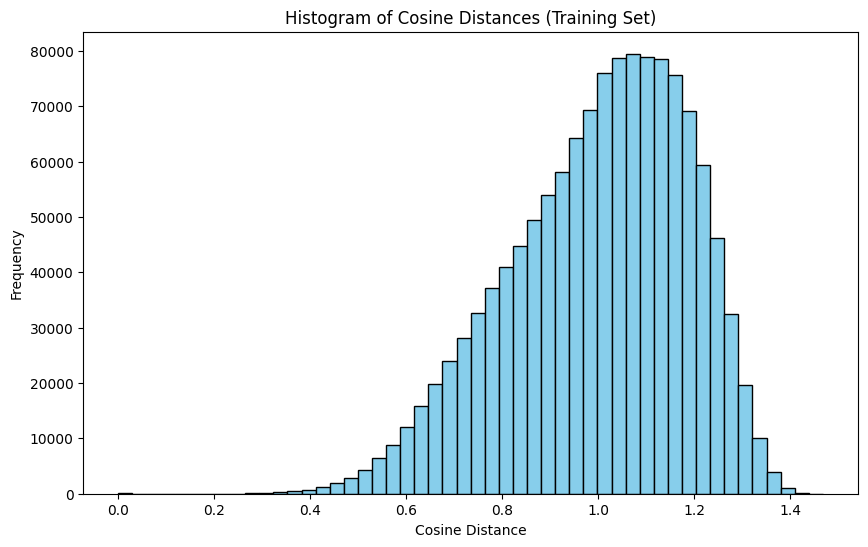

In [188]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
from collections import Counter
from sklearn.metrics import accuracy_score, f1_score, classification_report

# ---------------------------
# Provided: Converted fused features and labels from FTTransformer.
# These are NumPy arrays with:
# X_train: shape (1605, 192)
# X_val:   shape (344, 192)
# X_test:  shape (345, 192)
# y_train, y_val, y_test: raw labels (e.g., "CN", "MCI", "AD")
# ---------------------------

# Step 1: Normalize the features (L2 normalization)
X_train_norm = X_train / np.linalg.norm(X_train, axis=1, keepdims=True)
X_val_norm   = X_val   / np.linalg.norm(X_val, axis=1, keepdims=True)
X_test_norm  = X_test  / np.linalg.norm(X_test, axis=1, keepdims=True)

# Step 2: Compute the cosine similarity matrix for the training set.
train_cos_sim = cosine_similarity(X_train_norm)  # shape: (num_train, num_train)
# Cosine distance = 1 - cosine similarity.
train_cos_dist = 1 - train_cos_sim

print("Cosine distance matrix shape:", train_cos_dist.shape)

# Step 3: Plot a histogram of the cosine distances (using the upper triangle, excluding the diagonal)
n = train_cos_dist.shape[0]
upper_tri_indices = np.triu_indices(n, k=1)
dist_values = train_cos_dist[upper_tri_indices]

plt.figure(figsize=(10, 6))
plt.hist(dist_values, bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Cosine Distance')
plt.ylabel('Frequency')
plt.title('Histogram of Cosine Distances (Training Set)')
plt.show()


In [201]:
# Step 4: Form Global Tolerance Classes
# Choose an epsilon threshold based on the histogram; here, we use epsilon = 0.15 as an example.
epsilon = 0.09

# Create a binary tolerance matrix: True if distance < epsilon.
tolerance_matrix = (train_cos_dist < epsilon)

# Build a graph where each training sample is a node.
num_train = X_train_norm.shape[0]
G = nx.Graph()
G.add_nodes_from(range(num_train))
for i in range(num_train):
    for j in range(i+1, num_train):
        if tolerance_matrix[i, j]:
            G.add_edge(i, j)

# Extract connected components from the graph as tolerance classes.
tolerance_classes = list(nx.connected_components(G))
print("Number of tolerance classes formed:", len(tolerance_classes))
for idx, cls in enumerate(tolerance_classes, start=1):
    print(f"Tolerance Class {idx}: {len(cls)} samples")

Number of tolerance classes formed: 1411
Tolerance Class 1: 1 samples
Tolerance Class 2: 7 samples
Tolerance Class 3: 1 samples
Tolerance Class 4: 1 samples
Tolerance Class 5: 1 samples
Tolerance Class 6: 1 samples
Tolerance Class 7: 1 samples
Tolerance Class 8: 1 samples
Tolerance Class 9: 2 samples
Tolerance Class 10: 1 samples
Tolerance Class 11: 2 samples
Tolerance Class 12: 2 samples
Tolerance Class 13: 1 samples
Tolerance Class 14: 1 samples
Tolerance Class 15: 1 samples
Tolerance Class 16: 1 samples
Tolerance Class 17: 1 samples
Tolerance Class 18: 1 samples
Tolerance Class 19: 1 samples
Tolerance Class 20: 1 samples
Tolerance Class 21: 1 samples
Tolerance Class 22: 1 samples
Tolerance Class 23: 1 samples
Tolerance Class 24: 2 samples
Tolerance Class 25: 1 samples
Tolerance Class 26: 1 samples
Tolerance Class 27: 1 samples
Tolerance Class 28: 1 samples
Tolerance Class 29: 1 samples
Tolerance Class 30: 1 samples
Tolerance Class 31: 2 samples
Tolerance Class 32: 1 samples
Toleranc

In [192]:
target_names = [str(x) for x in np.unique(y_train)]
print(classification_report(y_test, predicted_labels, target_names=target_names))


              precision    recall  f1-score   support

           0       0.79      0.85      0.82        72
           1       0.97      0.99      0.98       106
           2       0.93      0.89      0.91       167

    accuracy                           0.91       345
   macro avg       0.90      0.91      0.90       345
weighted avg       0.91      0.91      0.91       345



In [202]:
# Step 5: Compute Prototype Vectors and Assign Labels via Majority Voting
rep_vectors_list = []
rep_labels_list = []
class_sizes = []

for cls in tolerance_classes:
    idx_list = list(cls)
    # Extract the corresponding normalized FTTransformer features.
    class_feats = X_train_norm[idx_list]  # shape: (num_samples_in_class, 192)
    # Compute the prototype (mean vector) for the class.
    rep_vector = class_feats.mean(axis=0)
    rep_vectors_list.append(rep_vector)
    
    # Use majority voting for the label (even if the class is impure).
    cls_labels = y_train[idx_list]
    label_counts = Counter(cls_labels)
    majority_label, majority_count = label_counts.most_common(1)[0]
    rep_labels_list.append(majority_label)
    class_sizes.append(len(idx_list))

rep_vectors = np.vstack(rep_vectors_list)  # shape: (num_tolerance_classes, 192)
rep_labels = np.array(rep_labels_list)

print("Number of prototypes (tolerance classes):", rep_vectors.shape[0])
for i in range(rep_vectors.shape[0]):
    print(f"Prototype {i+1}: Label = {rep_labels[i]}, Class Size = {class_sizes[i]}")

# Step 6: Testing Phase – Classify Test Samples Using the Prototypes
# Compute cosine similarity between each test sample and each prototype.
sim_matrix_test = cosine_similarity(X_test_norm, rep_vectors)  # shape: (n_test, num_prototypes)

# For each test sample, find the prototype with the highest cosine similarity.
predicted_indices = np.argmax(sim_matrix_test, axis=1)
predicted_labels = rep_labels[predicted_indices]

# Evaluate predictions.
acc = accuracy_score(y_test, predicted_labels)
f1 = f1_score(y_test, predicted_labels, average='weighted')

print("Test Accuracy:", acc)
print("Weighted F1 Score:", f1)
print("Classification Report:")
print(classification_report(y_test, predicted_labels, target_names=list(np.unique(y_train))))

Number of prototypes (tolerance classes): 1411
Prototype 1: Label = 1, Class Size = 1
Prototype 2: Label = 1, Class Size = 7
Prototype 3: Label = 1, Class Size = 1
Prototype 4: Label = 1, Class Size = 1
Prototype 5: Label = 1, Class Size = 1
Prototype 6: Label = 1, Class Size = 1
Prototype 7: Label = 2, Class Size = 1
Prototype 8: Label = 2, Class Size = 1
Prototype 9: Label = 0, Class Size = 2
Prototype 10: Label = 2, Class Size = 1
Prototype 11: Label = 1, Class Size = 2
Prototype 12: Label = 2, Class Size = 2
Prototype 13: Label = 1, Class Size = 1
Prototype 14: Label = 0, Class Size = 1
Prototype 15: Label = 2, Class Size = 1
Prototype 16: Label = 2, Class Size = 1
Prototype 17: Label = 0, Class Size = 1
Prototype 18: Label = 2, Class Size = 1
Prototype 19: Label = 1, Class Size = 1
Prototype 20: Label = 2, Class Size = 1
Prototype 21: Label = 2, Class Size = 1
Prototype 22: Label = 1, Class Size = 1
Prototype 23: Label = 0, Class Size = 1
Prototype 24: Label = 2, Class Size = 2
Pr

TypeError: object of type 'numpy.int64' has no len()

In [200]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Compute cosine similarity between each test sample and each prototype.
sim_matrix = cosine_similarity(X_test_norm, rep_vectors)  # shape: (n_test, num_prototypes)

# For each test sample, find the prototype with the highest cosine similarity.
predicted_indices = np.argmax(sim_matrix, axis=1)

# Map these indices to the corresponding labels.
predicted_labels = rep_labels[predicted_indices]

# Evaluate predictions.
acc = accuracy_score(y_test, predicted_labels)
f1 = f1_score(y_test, predicted_labels, average='weighted')

print("Test Accuracy:", acc)
print("Weighted F1 Score:", f1)

# Convert target names to strings.
target_names = [str(x) for x in np.unique(y_train)]
print("Classification Report:")
print(classification_report(y_test, predicted_labels, target_names=target_names))


Test Accuracy: 0.9101449275362319
Weighted F1 Score: 0.91055045635266
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82        72
           1       0.97      0.99      0.98       106
           2       0.93      0.89      0.91       167

    accuracy                           0.91       345
   macro avg       0.90      0.91      0.90       345
weighted avg       0.91      0.91      0.91       345

